In [792]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

In [793]:
START = 0
END = 1.0
POINTS = 1000
A = 2
F1 = 50
F2 = 100

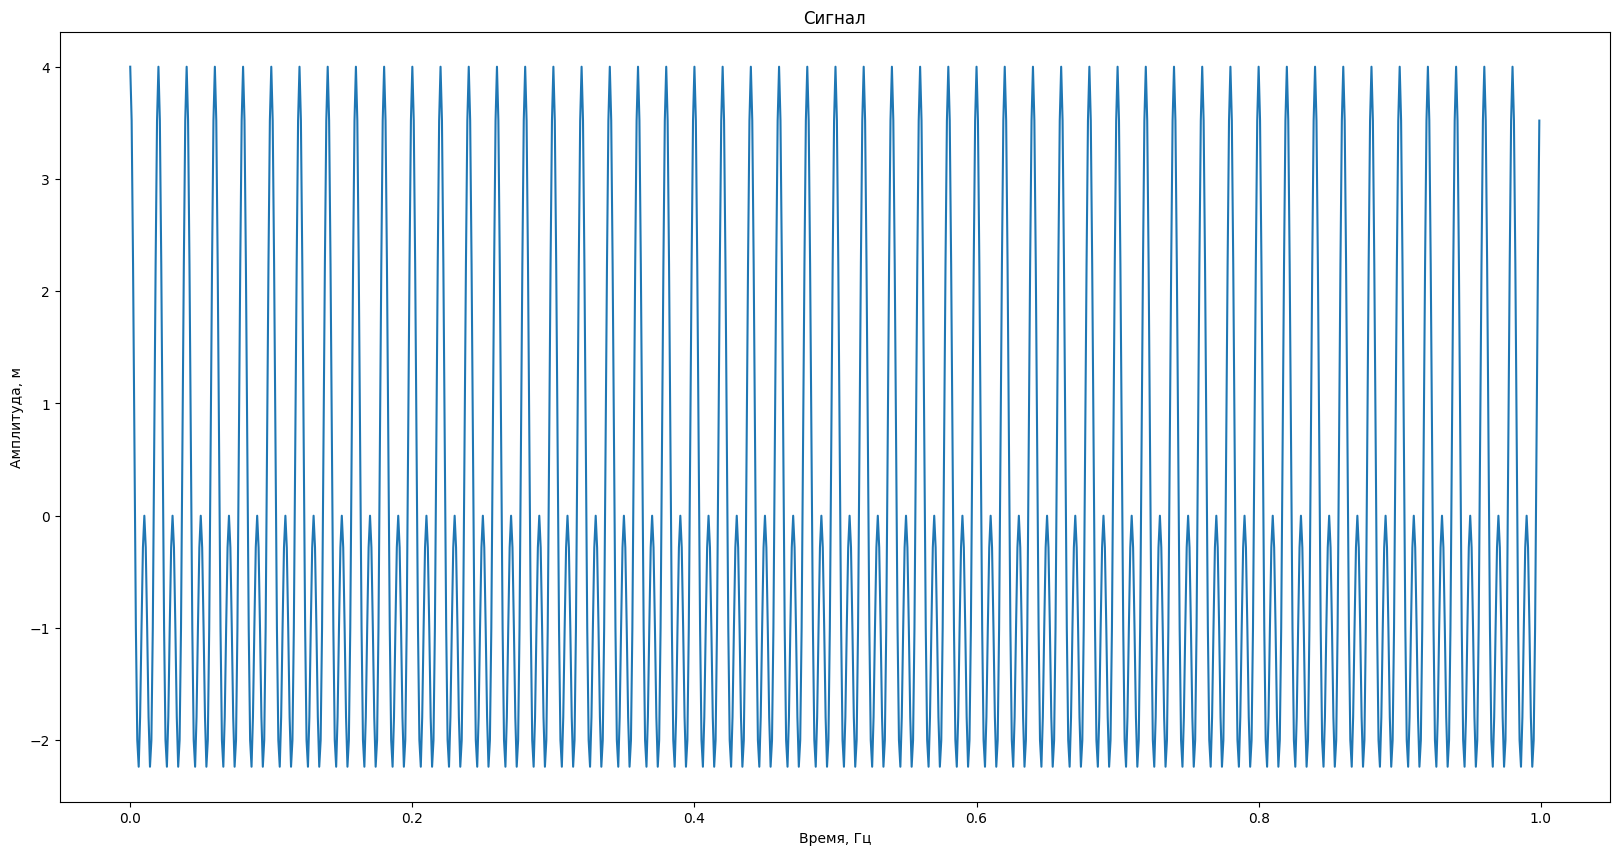

In [794]:
def cyclic_frequency_(f):
    """
    Функция нахождения циклической частоты через частоту

    Параметры
    ---------
    f - частота

    Возвращает
    ----------
    Значение циклической частоты
    """
    return 2 * np.pi * f

def func_1(x, f, A):
    """
    Функция косиинуса заданной частоты 

    Параметры
    ---------
    x - значения оси OX
    f - частота
    A - амплитуда сигнала

    Возвращает
    ----------
    Значение функции косинуса с заданными параметрами 
    """
    return A * np.cos(cyclic_frequency_(f) * x)

X = np.linspace(START, END, POINTS, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, F2, A) for t in X])
Y = y1 + y2

plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot(X, Y)
plt.show()



In [795]:
def spectrum(x, y) :
    """
    Нахождение спектра сигнала

    Параметры
    ---------
    x - аргументы функции
    y - значения функции

    Возвращает
    ----------
    
    """
    xff = np.arange(len(x))
    yff = np.fft.fft(y) / len(x)
    return xff, yff 

# Задание №1

### Реализовать усреднение зашумленного сигнала

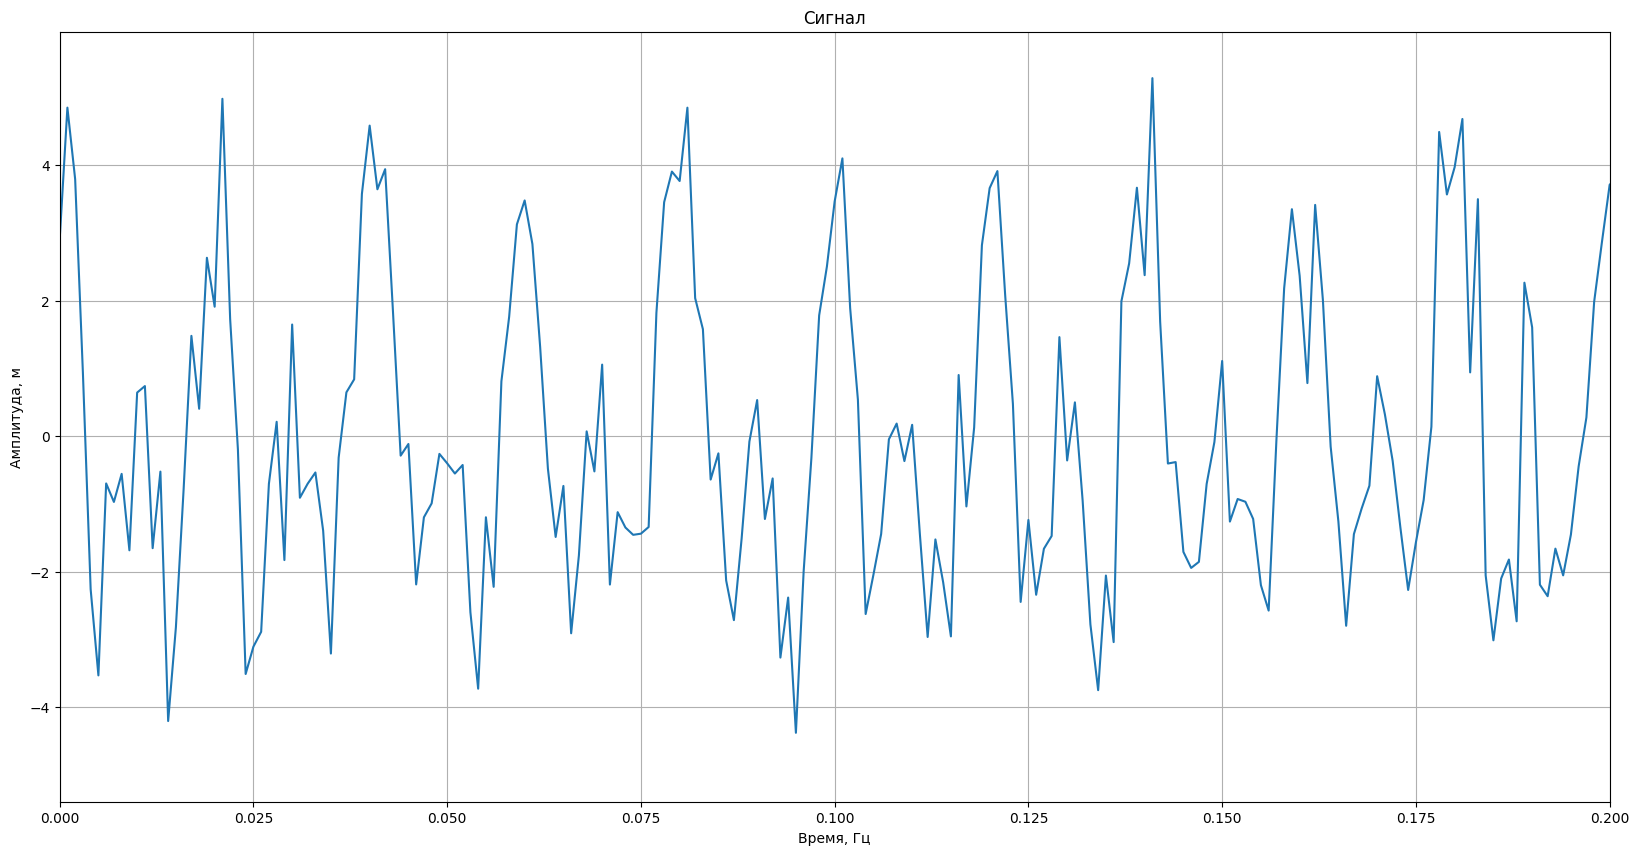

In [796]:
Y_ =Y + np.random.normal(0, 1, X.shape)
plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot(X, Y_)
plt.xlim(0, 0.2)
plt.grid()
plt.show()

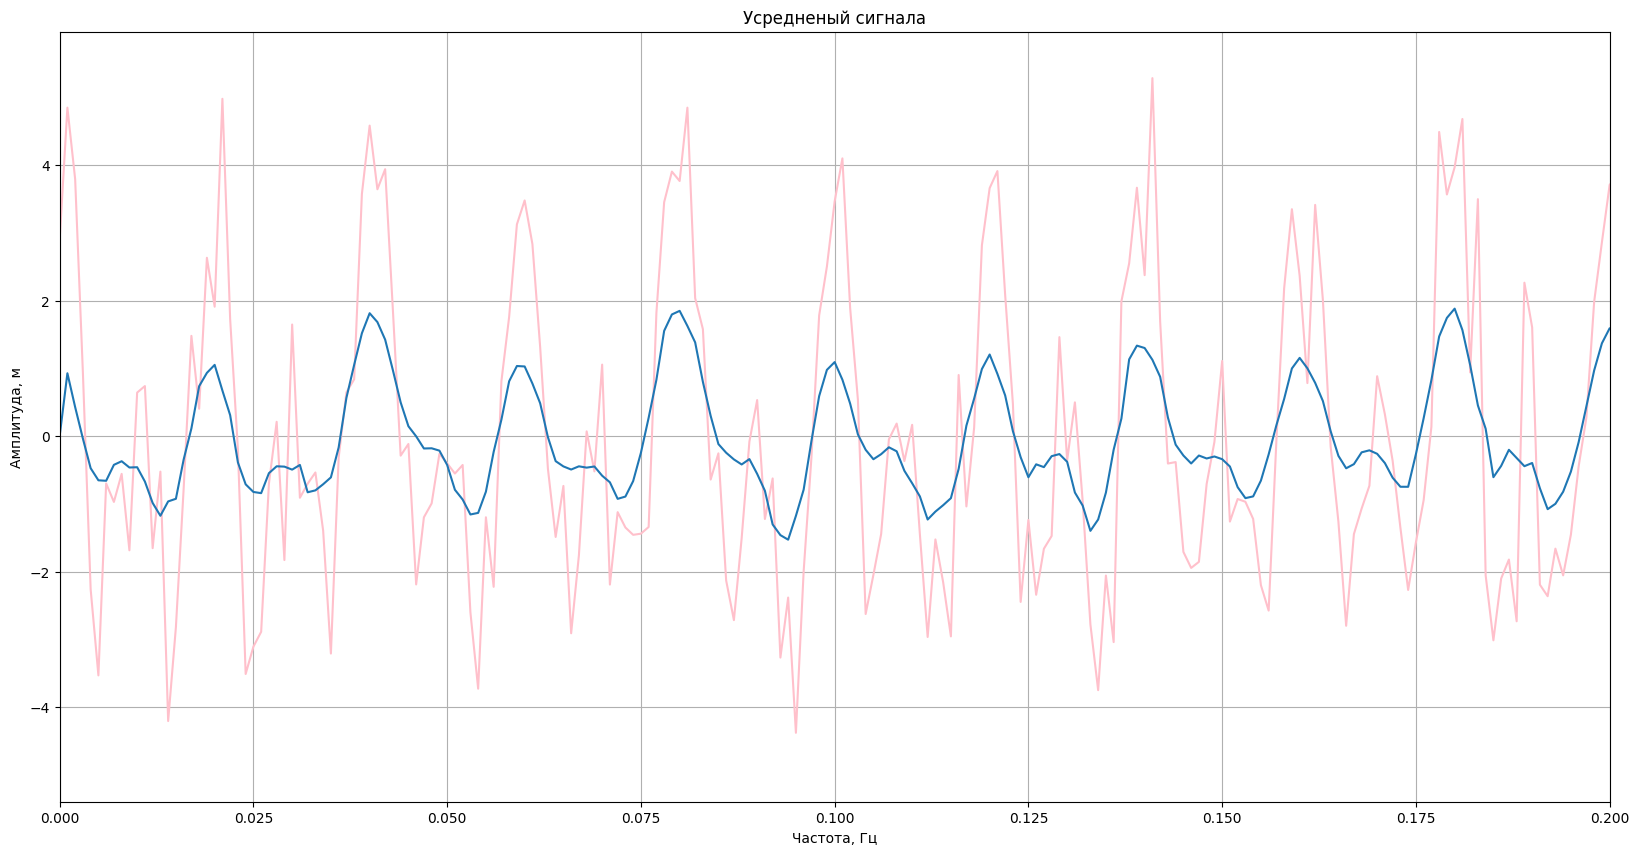

In [797]:
K = 5

helper_signal = np.concatenate((np.zeros(K), Y_, np.zeros(K)), axis = 0)
l = len(helper_signal) - K
mean_sigal = helper_signal

for i in range(K, l):
    mean_sigal[i] = 1 / (2*K + 1) * np.sum(helper_signal[i - K: i + K]) 
mean_sigal = mean_sigal[K - 1:-(K + 1)]

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Усредненый сигнала')
plt.plot(X, Y_, 'pink')
plt.plot(X, mean_sigal)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

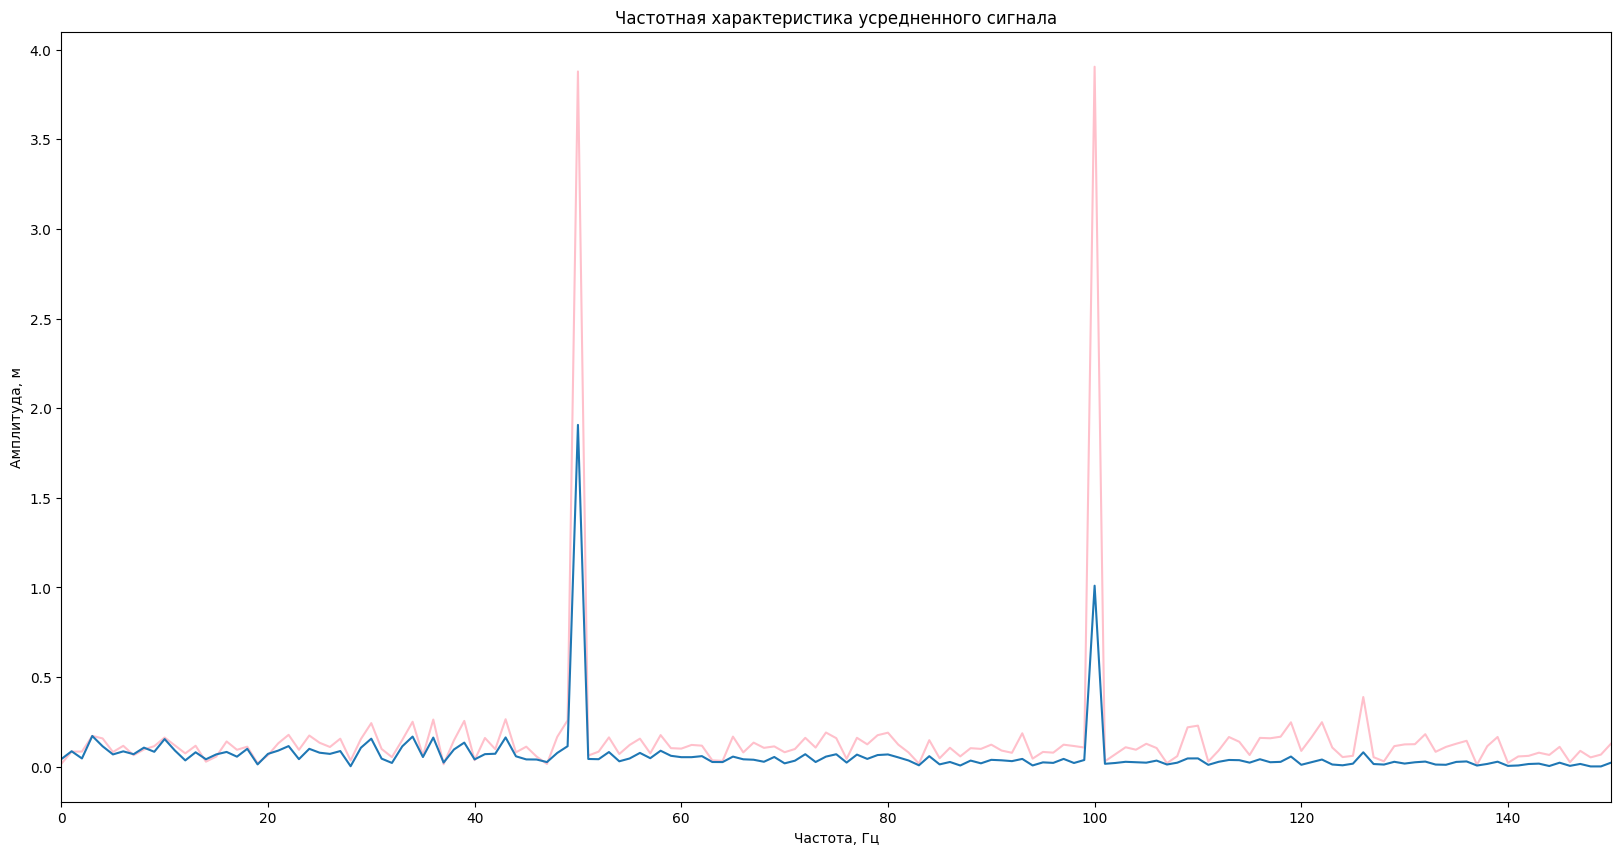

In [798]:
xf1, yf1= spectrum(X, Y_)
xf2, yf2 = spectrum(X, mean_sigal)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частотная характеристика усредненного сигнала')
plt.plot(xf1, np.abs(2 * A * yf1), 'pink')
plt.plot(xf2, np.abs(2 * A * yf2))
plt.xlim(0,F2 + 50)
plt.show()

# Задание №2

### Воспользоваться усреднением по Гауссу

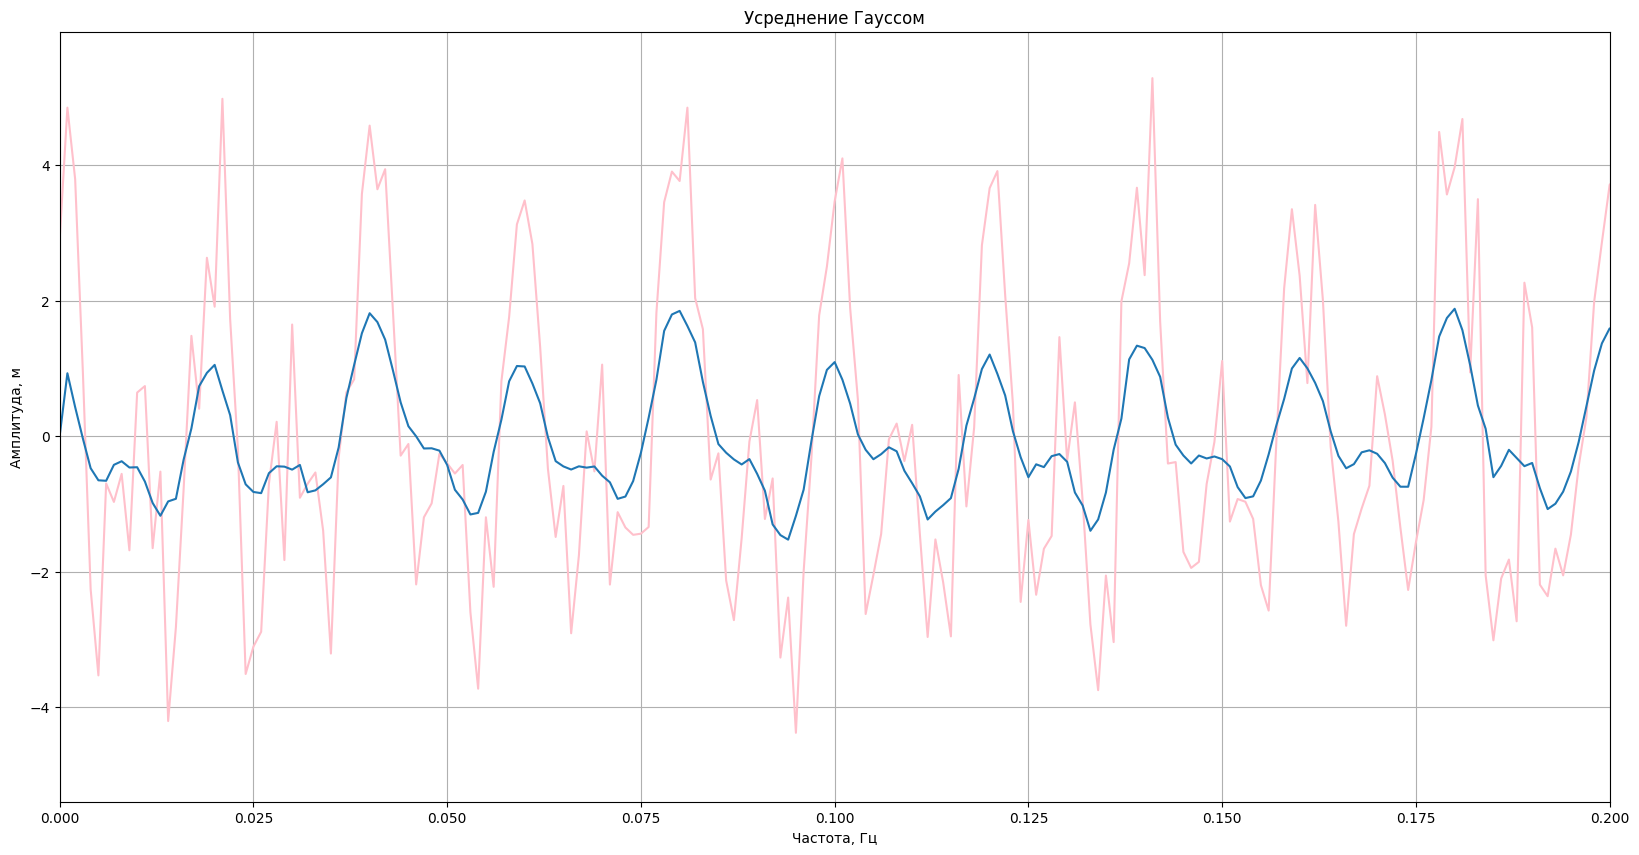

In [799]:
K = 5
W = 10

helper_signal = np.concatenate((np.zeros(K), Y_, np.zeros(K)), axis = 0)
l = len(helper_signal) - K
gausse_signal = helper_signal

window = [np.exp((-4 * np.log(2) * i * i)/ (W * W)) for i in X]
window = np.concatenate((np.zeros(K), window, np.zeros(K)), axis = 0)

for i in range(K, l): 
    gausse_signal[i] = np.sum(helper_signal[i - K: i + K] * window[i - K: i + K])  / (2 * K + 1)
gausse_signal = gausse_signal[K - 1:-(K + 1)]

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Усреднение Гауссом')
plt.plot(X, Y_, 'pink')
plt.plot(X, gausse_signal)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

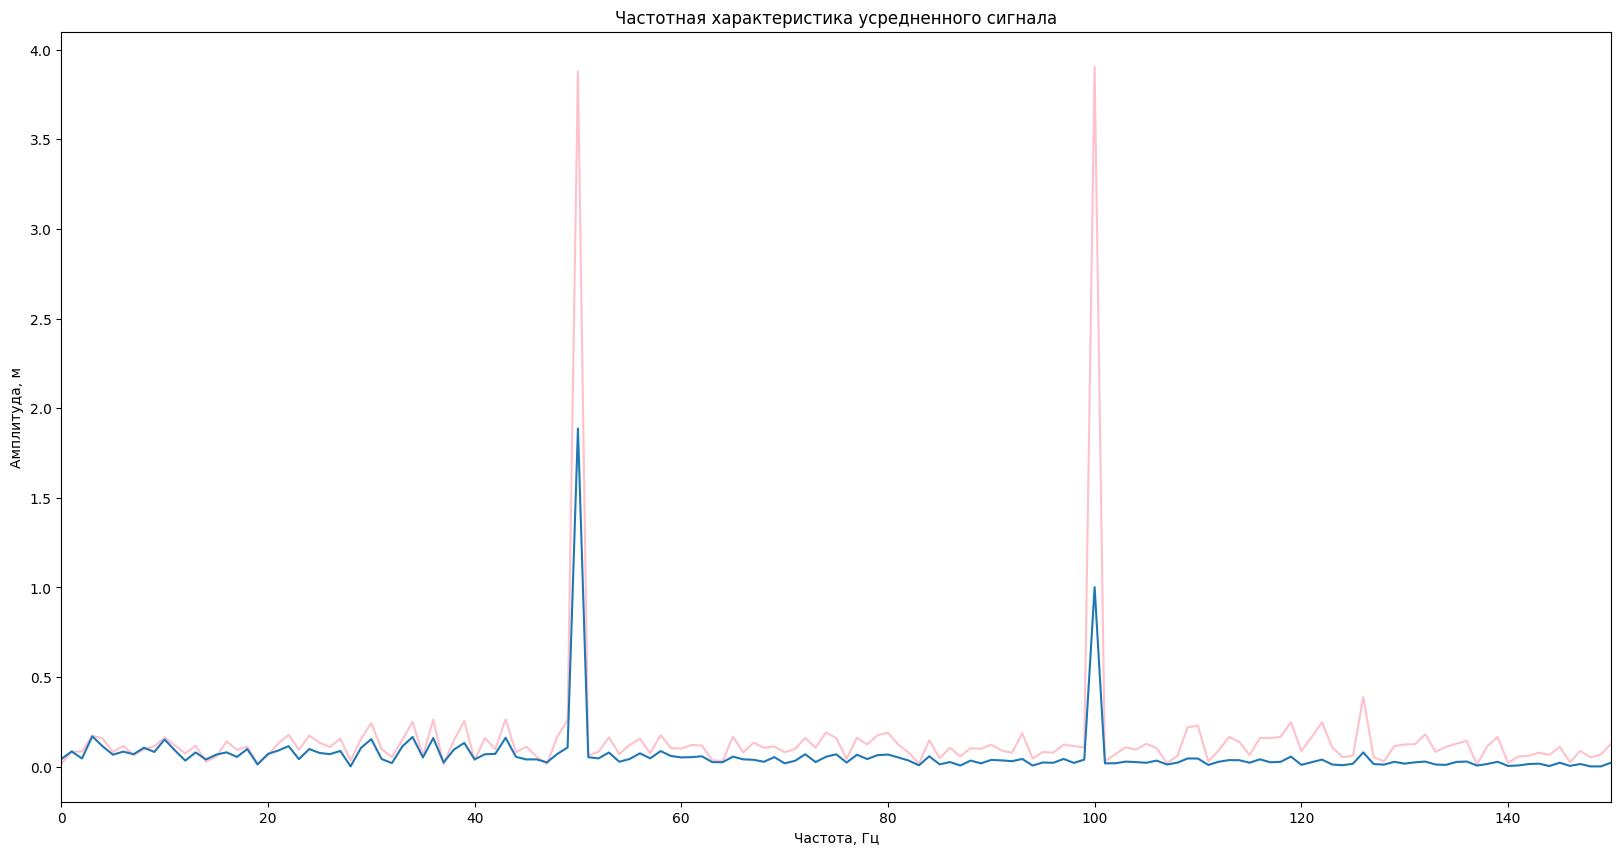

In [800]:
xf1, yf1= spectrum(X, Y_)
xf2, yf2 = spectrum(X, gausse_signal)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частотная характеристика усредненного сигнала')
plt.plot(xf1, np.abs(2 * A * yf1), 'pink')
plt.plot(xf2, np.abs(2 * A * yf2))
plt.xlim(0,F2 + 50)
plt.show()

# Задание №3

### Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков

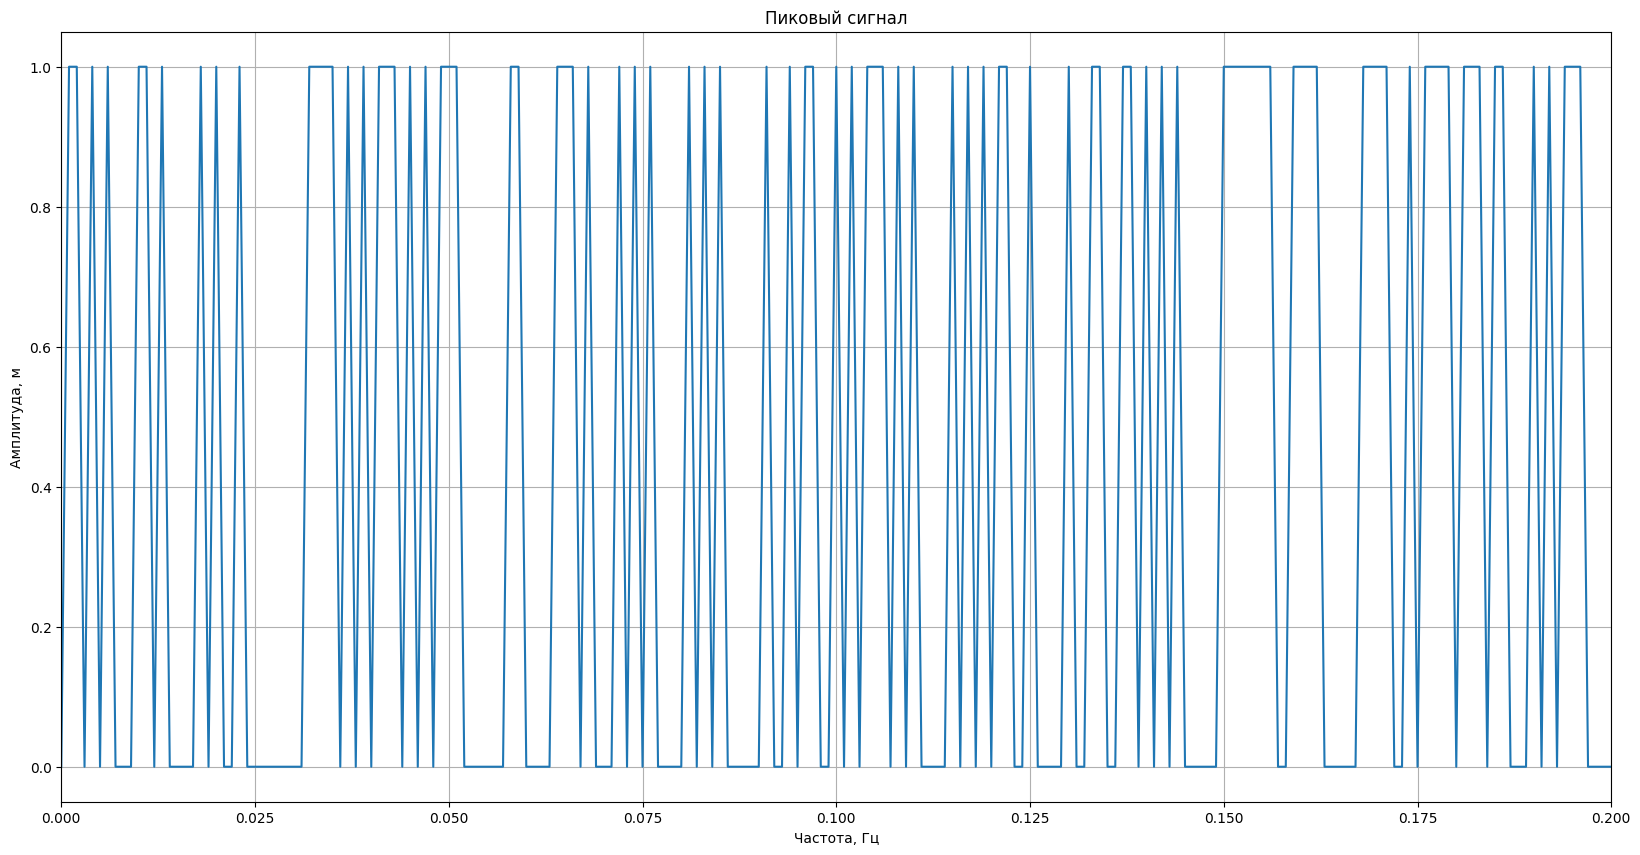

In [801]:
random_number = np.random.randint(0,2,POINTS)
plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Пиковый сигнал')
plt.plot(X, random_number)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

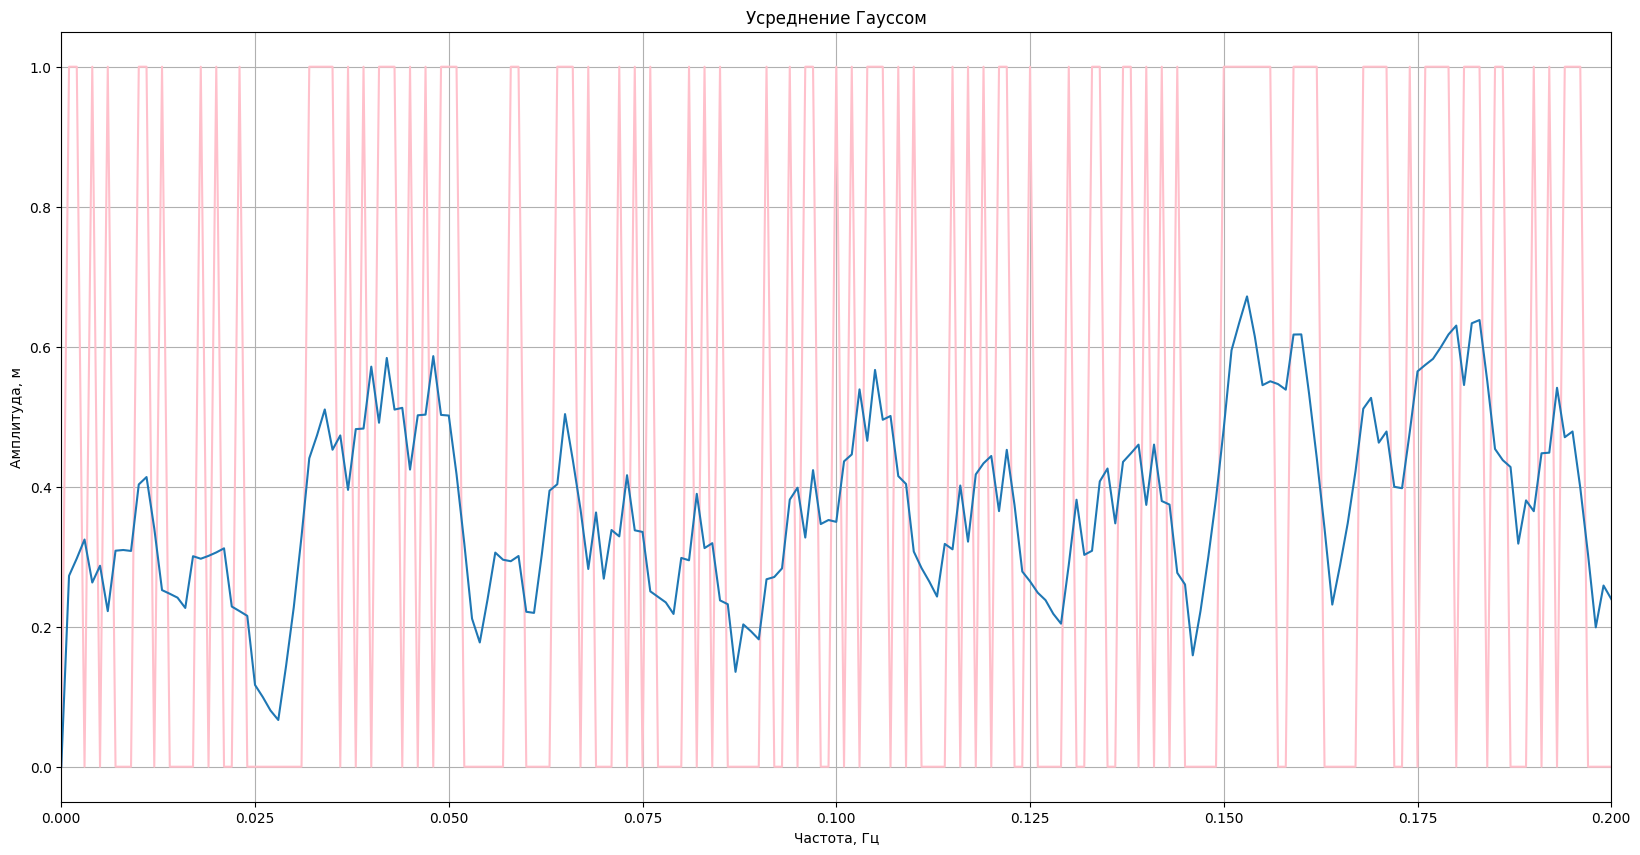

In [802]:
K = 5
W = 10

helper_signal = np.concatenate((np.zeros(K), random_number, np.zeros(K)), axis = 0)
l = len(helper_signal) - K
gausse_signal = helper_signal

window = [np.exp((-4 * np.log(2) * i * i)/ (W * W)) for i in X]
window = np.concatenate((np.zeros(K), window, np.zeros(K)), axis = 0)

for i in range(K, l): 
    gausse_signal[i] = np.sum(helper_signal[i - K: i + K] * window[i - K: i + K])  / (2 * K + 1)
gausse_signal = gausse_signal[K - 1:-(K + 1)]

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Усреднение Гауссом')
plt.plot(X, random_number, 'pink')
plt.plot(X, gausse_signal)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

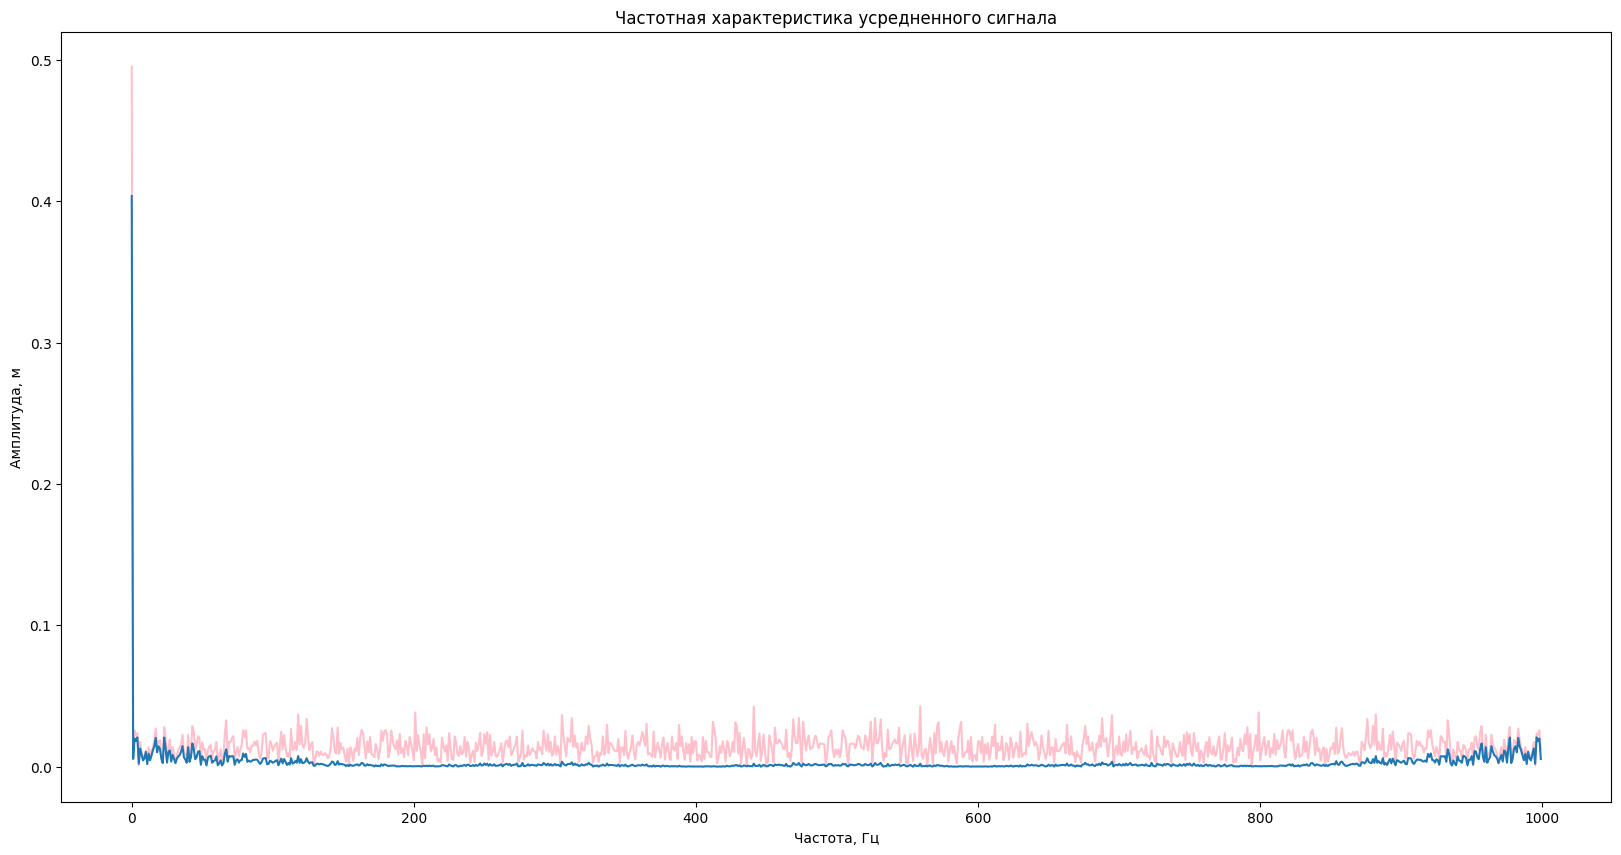

In [803]:
xf1, yf1= spectrum(X, random_number)
xf2, yf2 = spectrum(X, gausse_signal)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частотная характеристика усредненного сигнала')
plt.plot(xf1, np.abs (yf1), 'pink')
plt.plot(xf2, np.abs(yf2))
plt.show()

# Задание №4

### Реализовать медианный фильтр

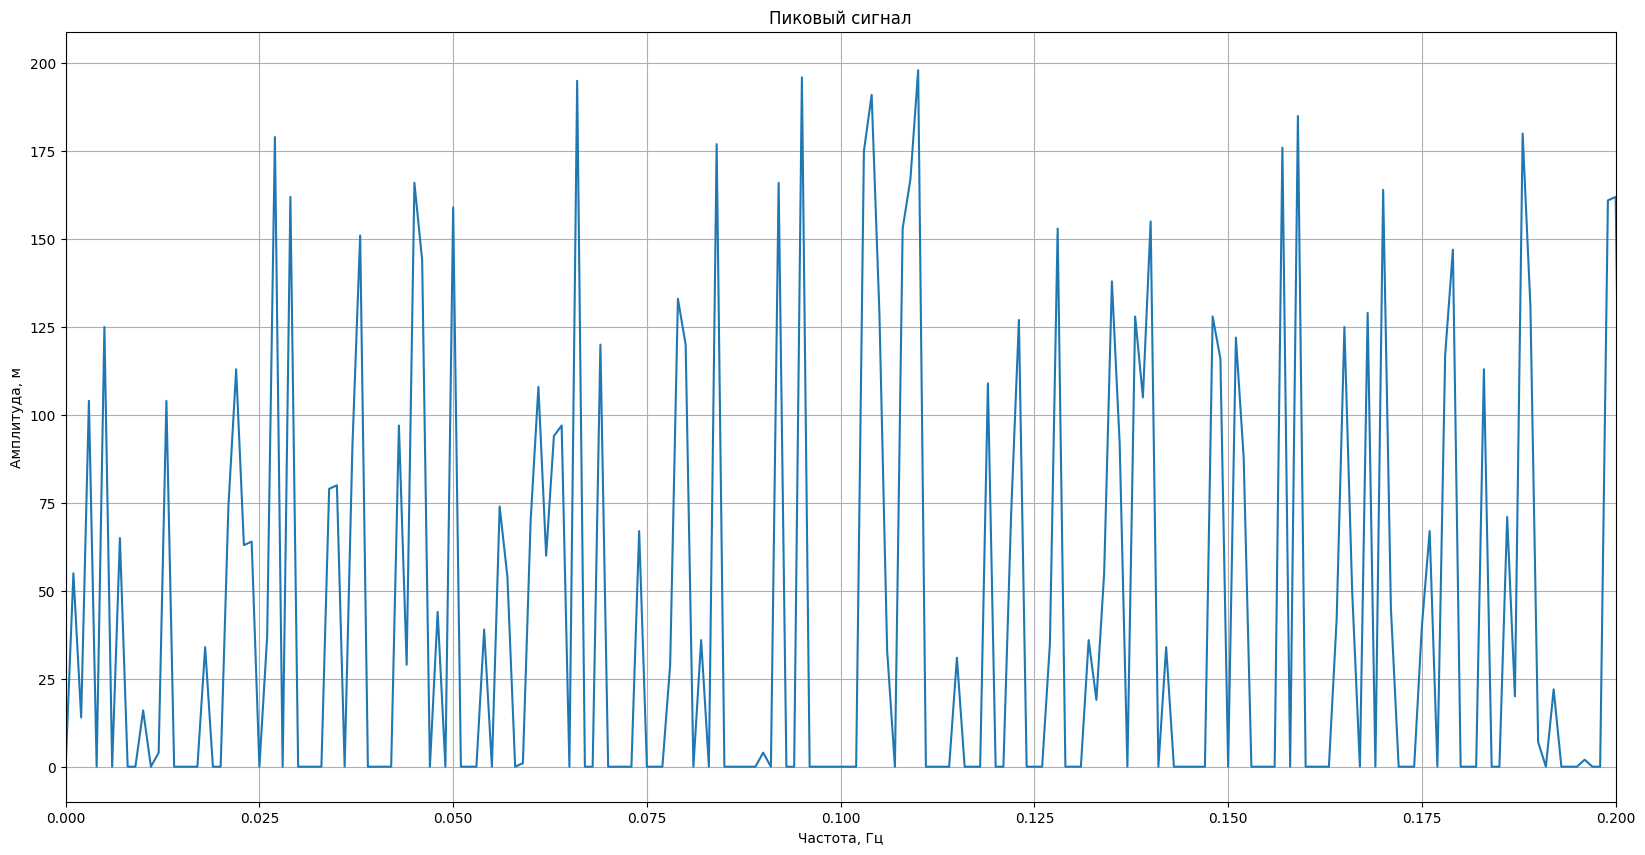

In [804]:
random_number1 = np.random.randint(0, 200, int(POINTS / 2))
random_number2 = np.zeros(int(POINTS / 2))
random_number = np.concatenate((random_number1, random_number2), axis = 0)
np.random.shuffle(random_number)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Пиковый сигнал')
plt.plot(X, random_number)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

In [805]:
K = 3

signal = [random_number[0]]
signal += list(random_number)
signal.append(random_number[-1])

median_signal = []
for i in range(K, len(signal) + 1):
    l = signal[i - K: i]
    l.sort()
    median_signal.append(l[K // 2])
    

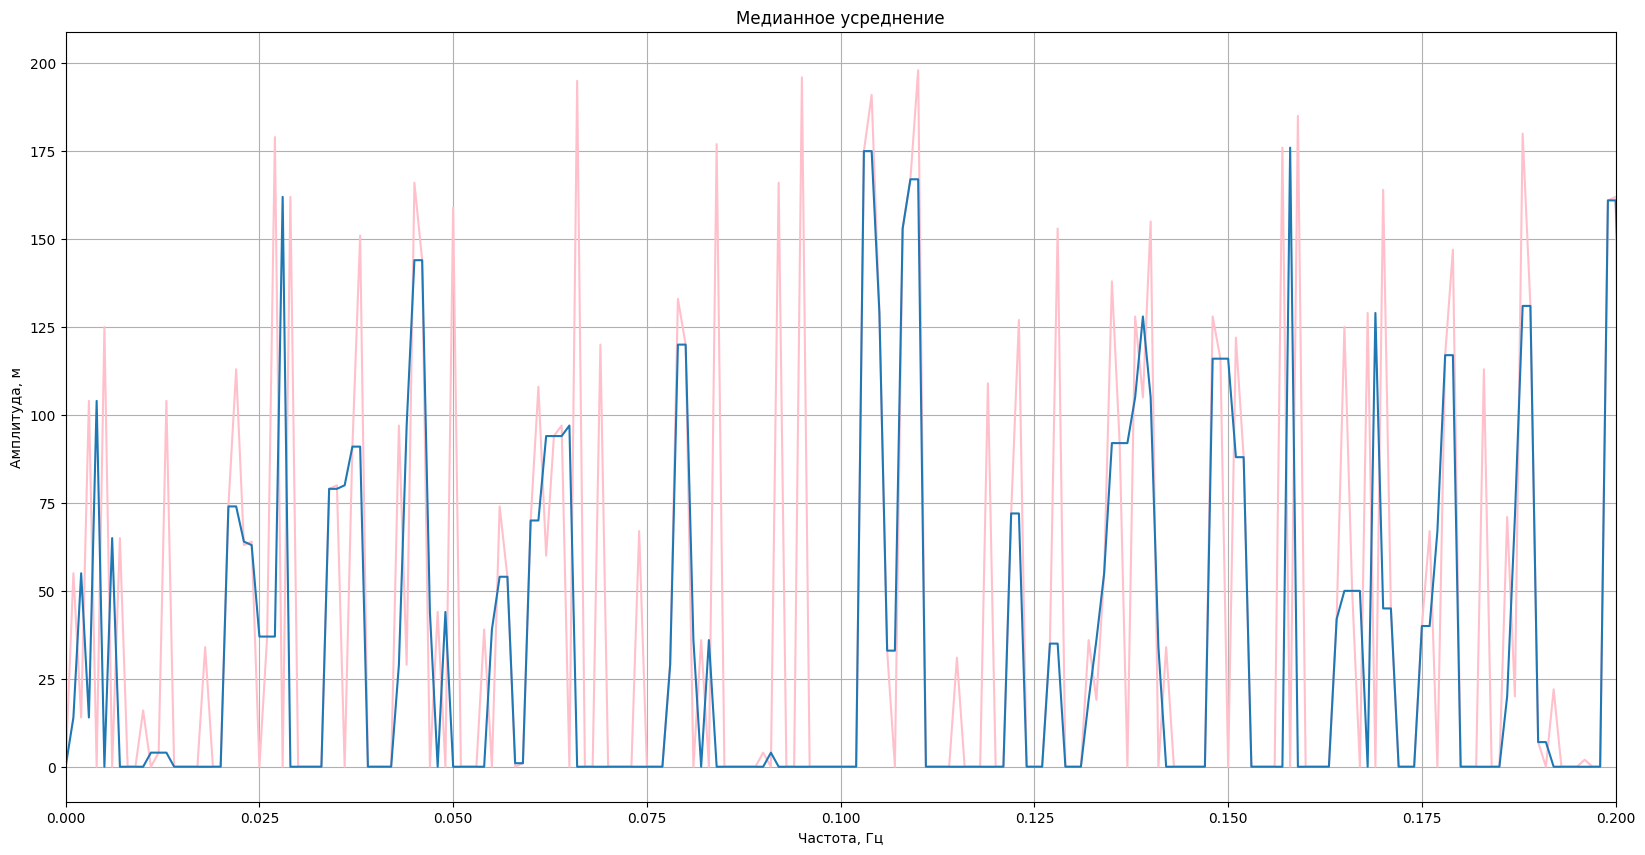

In [806]:
plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Медианное усреднение')
plt.plot(X, random_number, 'pink')
plt.plot(X, median_signal)
plt.grid()
plt.xlim(0, 0.2)
plt.show()

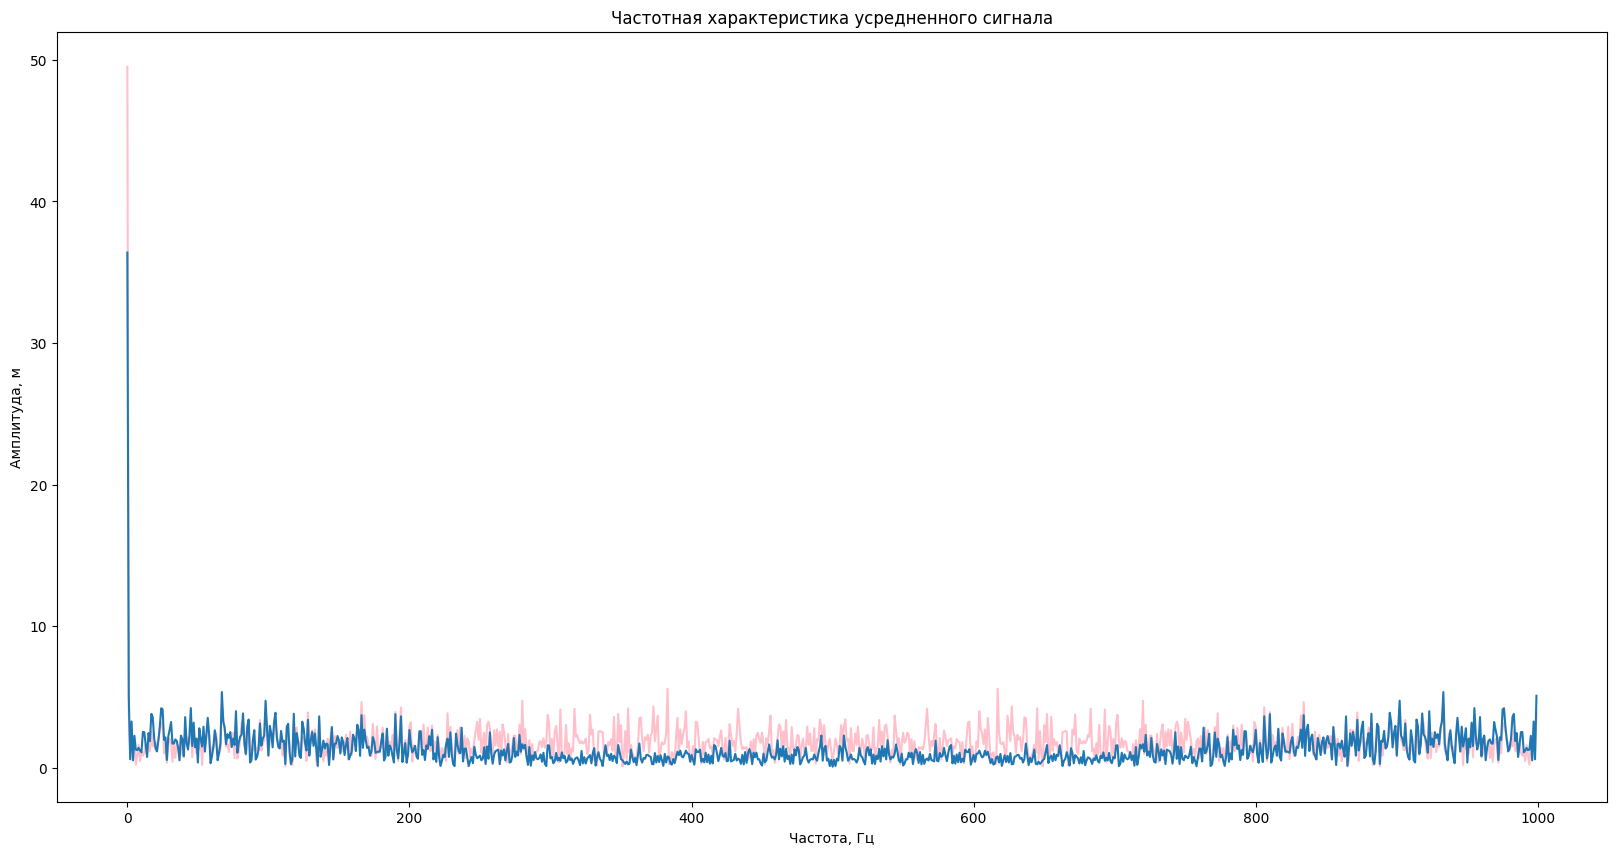

In [807]:
xf1, yf1= spectrum(X, random_number)
xf2, yf2 = spectrum(X, median_signal)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частотная характеристика усредненного сигнала')
plt.plot(xf1, np.abs (yf1), 'pink')
plt.plot(xf2, np.abs(yf2))
plt.show()

# Задание №5

### Метод спектральной интерполяции сигналов

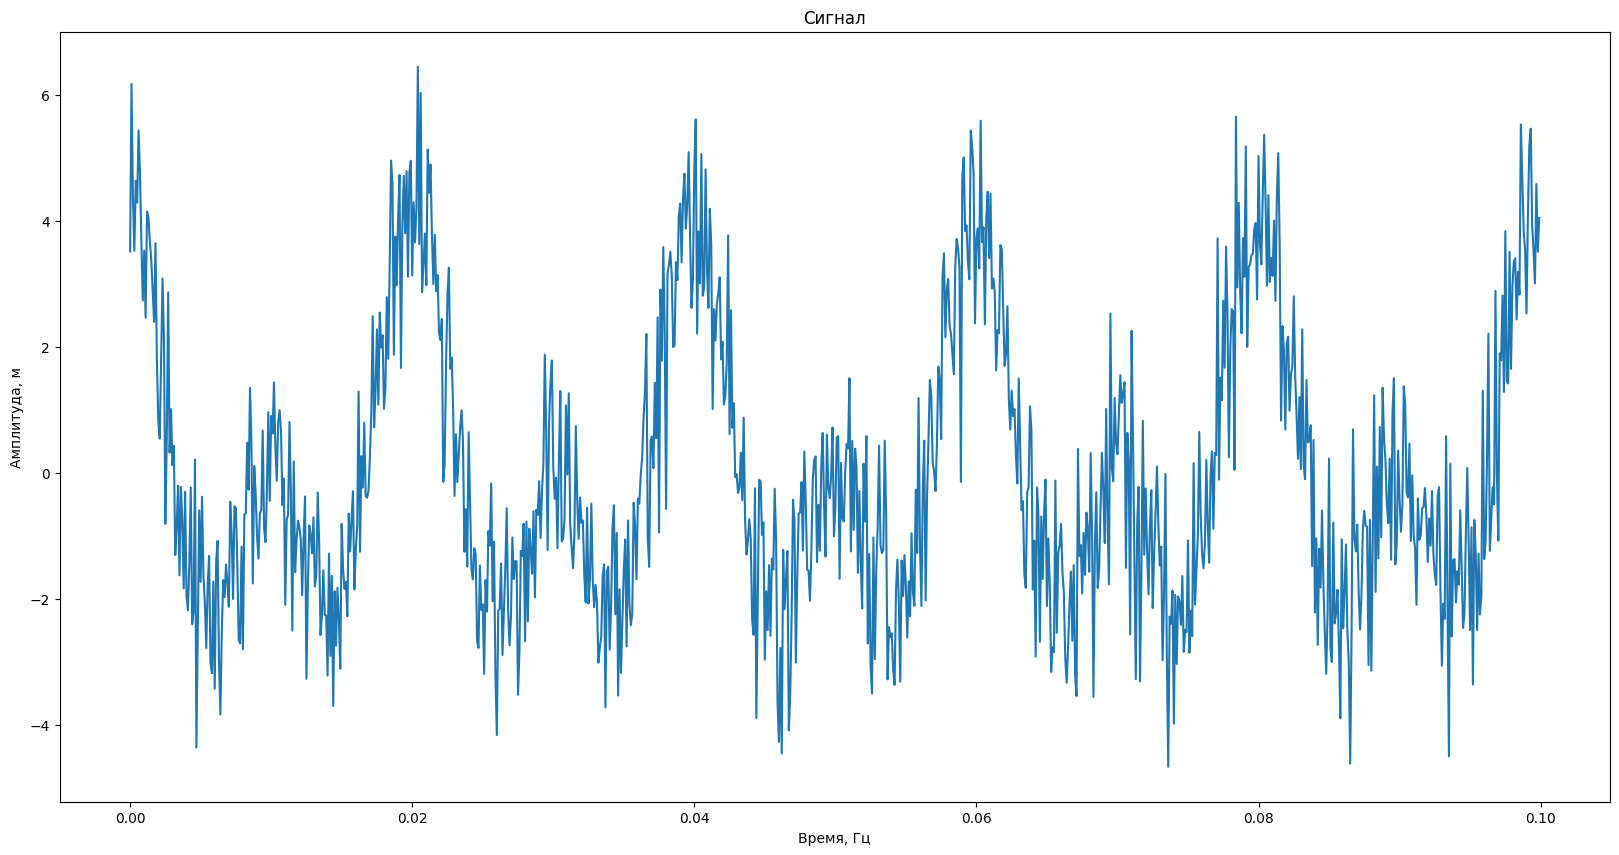

In [808]:
X = np.linspace(0, 0.1, POINTS, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, F2, A) for t in X])
Y = y1 + y2
Y += np.random.normal(0, 1, X.shape)

plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot(X, Y)
plt.show()

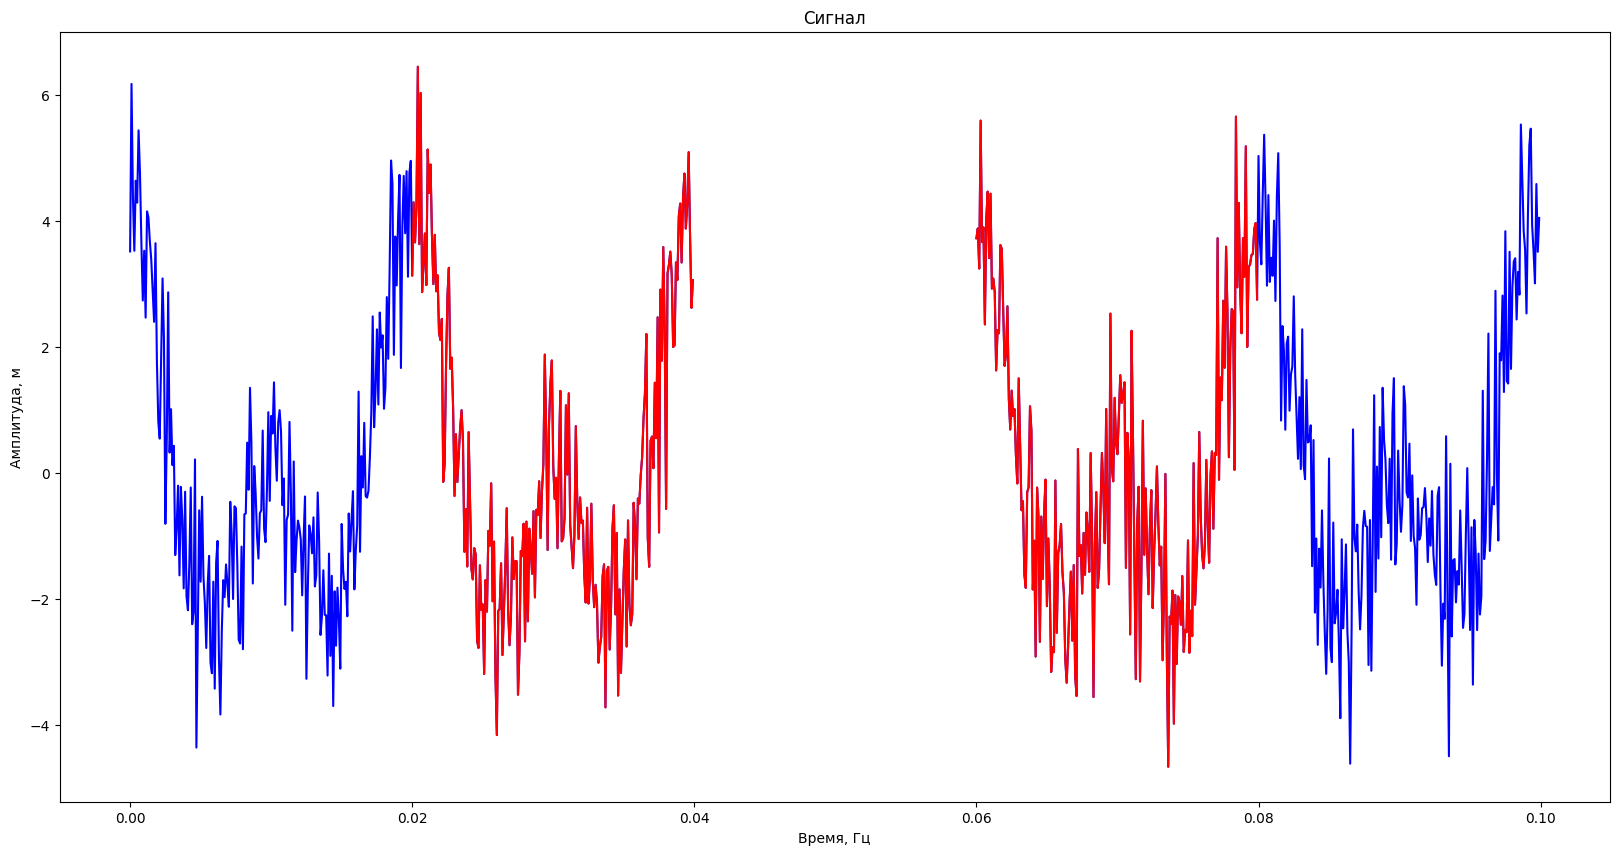

In [809]:
pass_period = (0.04, 0.06)
pass_period = (int(pass_period[0] * POINTS * 10), int(pass_period[1] * POINTS * 10))
get_period = 0.02
get_period = int(POINTS * 10 * get_period)

plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot((X[:pass_period[0]]), (Y[:pass_period[0]]), 'b')
plt.plot((X[pass_period[1]:]), (Y[pass_period[1]:]), 'b')
plt.plot((X[pass_period[0] - get_period:pass_period[0]]), (Y[pass_period[0] - get_period:pass_period[0]]), 'r')
plt.plot((X[pass_period[1]:pass_period[1] + get_period]), (Y[pass_period[1]:pass_period[1] + get_period]), 'r')
plt.show()

In [810]:
xf1, yf1= spectrum(X[pass_period[0] - get_period:pass_period[0]], Y[pass_period[0] - get_period:pass_period[0]])
xf2, yf2 = spectrum(X[pass_period[1]:pass_period[1] + get_period], Y[pass_period[1]:pass_period[1] + get_period])

In [811]:
lost_signal = (yf1 + yf2) / 2
lost_signal.shape

(200,)

In [812]:
lost_signal = np.fft.ifft(lost_signal * len(xf1))
lost_x = X[pass_period[0]:pass_period[1]]

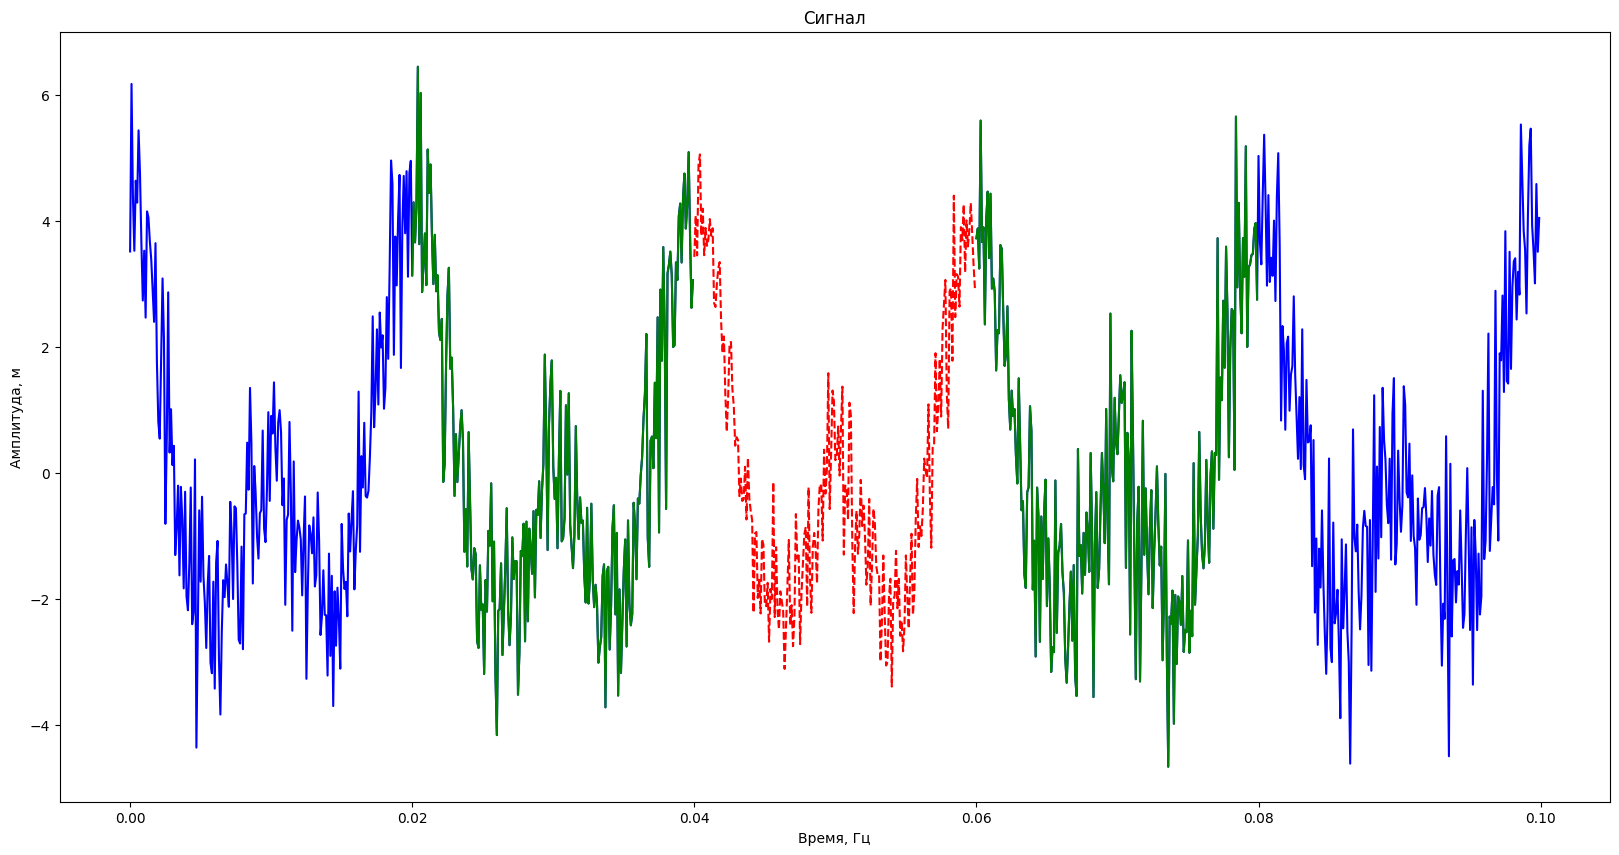

In [813]:
# print(lost_x[((pass_period[1] - pass_period[0]) - len(lost_signal)) // 2 - 1])
# f1 = interpolate.interp1d([X[pass_period[0]], lost_x[((pass_period[1] - pass_period[0]) - len(lost_signal)) // 2 - 1]], [Y[pass_period[0], lost_signal[((pass_period[1] - pass_period[0]) - len(lost_signal)) // 2 - 1]],],kind = 'linear')
# f2 = interpolate.interp1d([X[pass_period[1]], lost_x[(len(lost_signal) + pass_period[1] + pass_period[0]) // 2]], [Y[pass_period[0], lost_signal[(len(lost_signal) + pass_period[1] + pass_period[0]) // 2]],],kind = 'linear')

# ydw = np.concatenate(())
plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot((X[:pass_period[0]]), (Y[:pass_period[0]]), 'b')
plt.plot((X[pass_period[1]:]), (Y[pass_period[1]:]), 'b')
plt.plot((X[pass_period[0] - get_period:pass_period[0]]), (Y[pass_period[0] - get_period:pass_period[0]]), 'g')
plt.plot((X[pass_period[1]:pass_period[1] + get_period]), (Y[pass_period[1]:pass_period[1] + get_period]), 'g')
plt.plot(lost_x, lost_signal, 'r--')
# plt.xlim(0,0.2)
plt.show()

# Задание №6

### Понижение дискретизации

In [814]:
POINTS = 10000

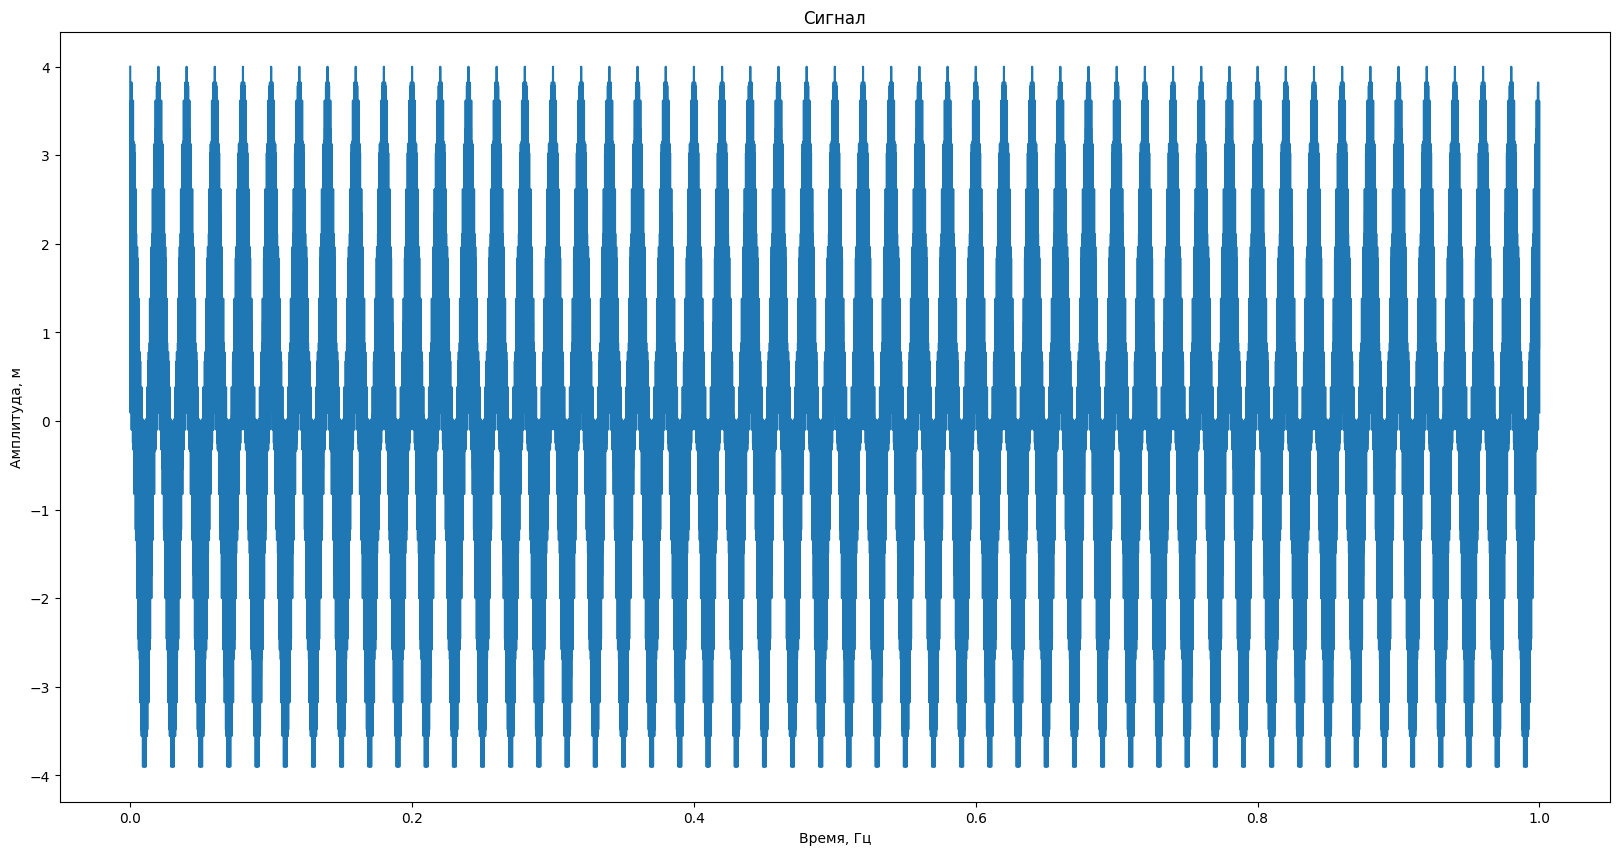

In [815]:
X = np.linspace(START, END, POINTS, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, 4500, A) for t in X])
Y = y1 + y2

plt.figure(figsize=(20, 10))
plt.xlabel('Время, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Сигнал')
plt.plot(X, Y)
plt.show()

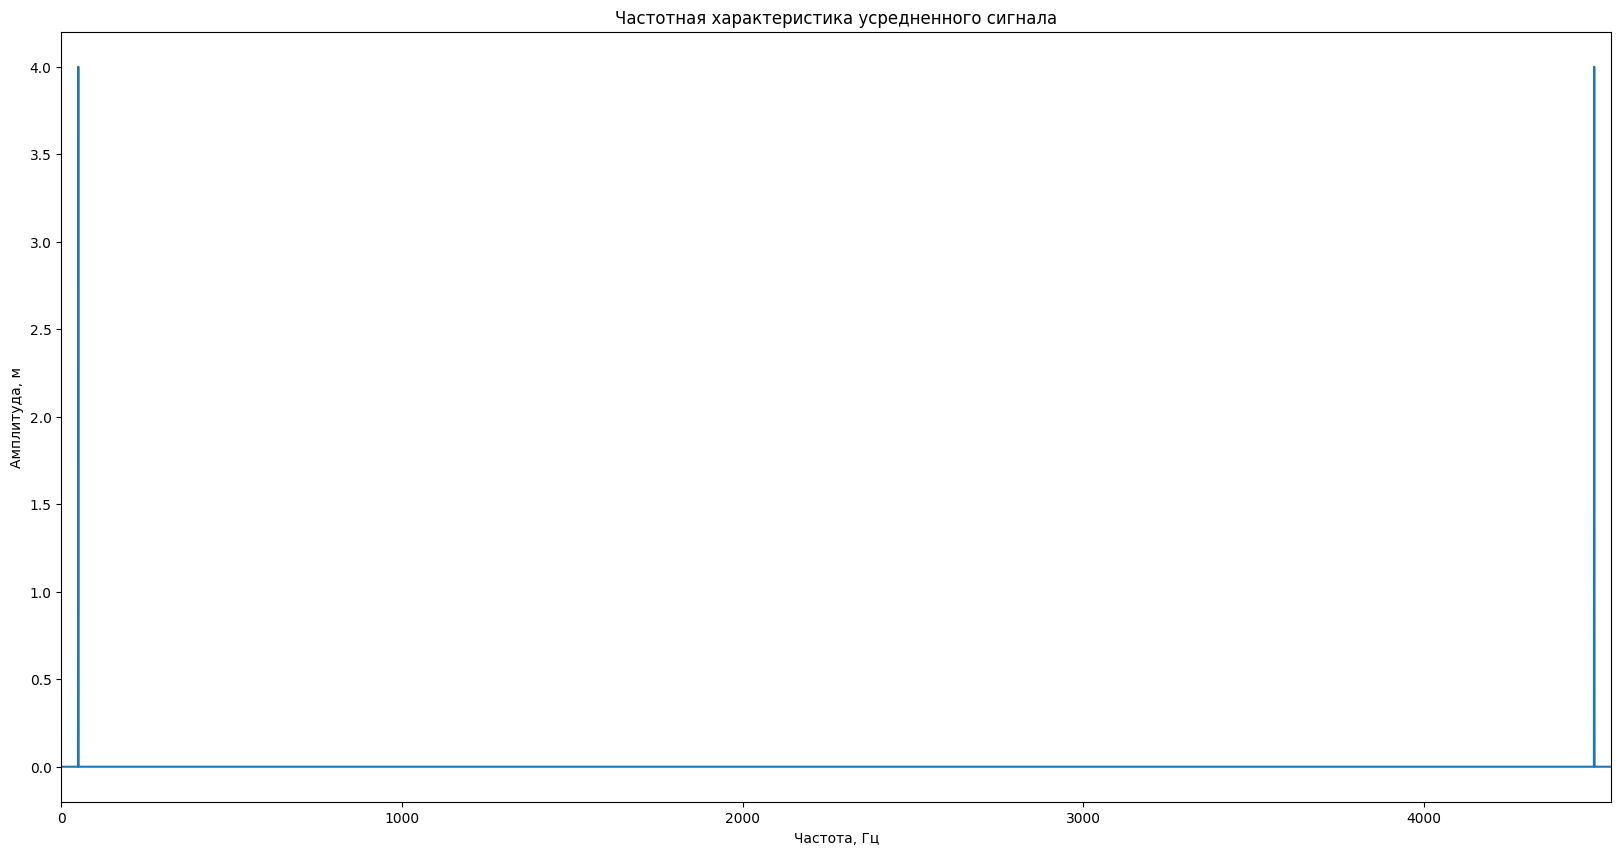

In [816]:
xf1, yf1= spectrum(X, Y)

plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частотная характеристика усредненного сигнала')
plt.plot(xf1, np.abs(2 * A * yf1))
plt.xlim(0,4500 + 50)
plt.show()

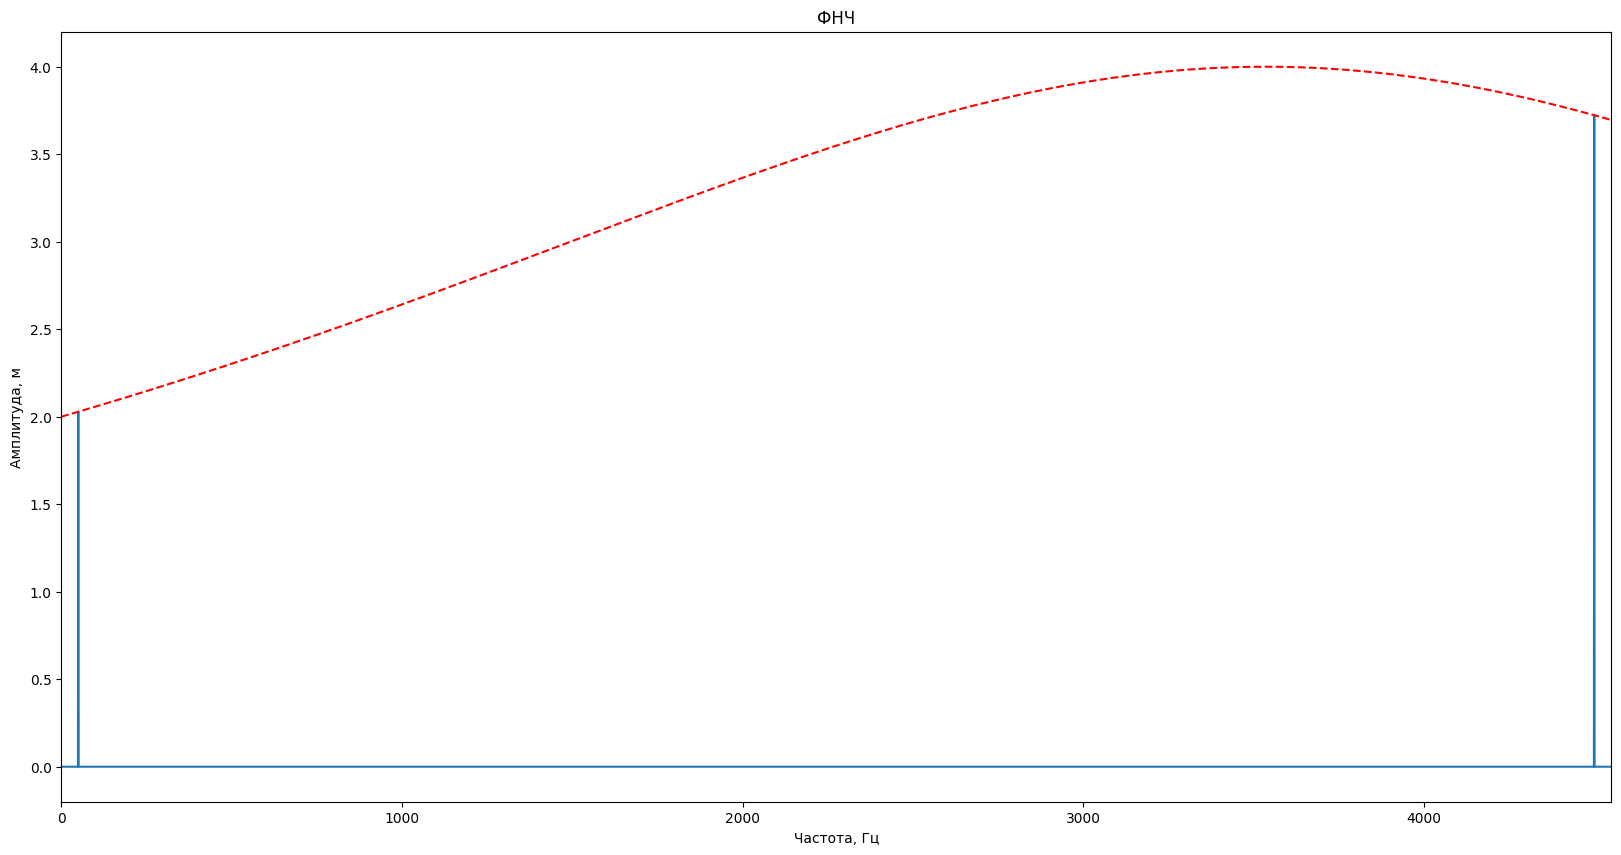

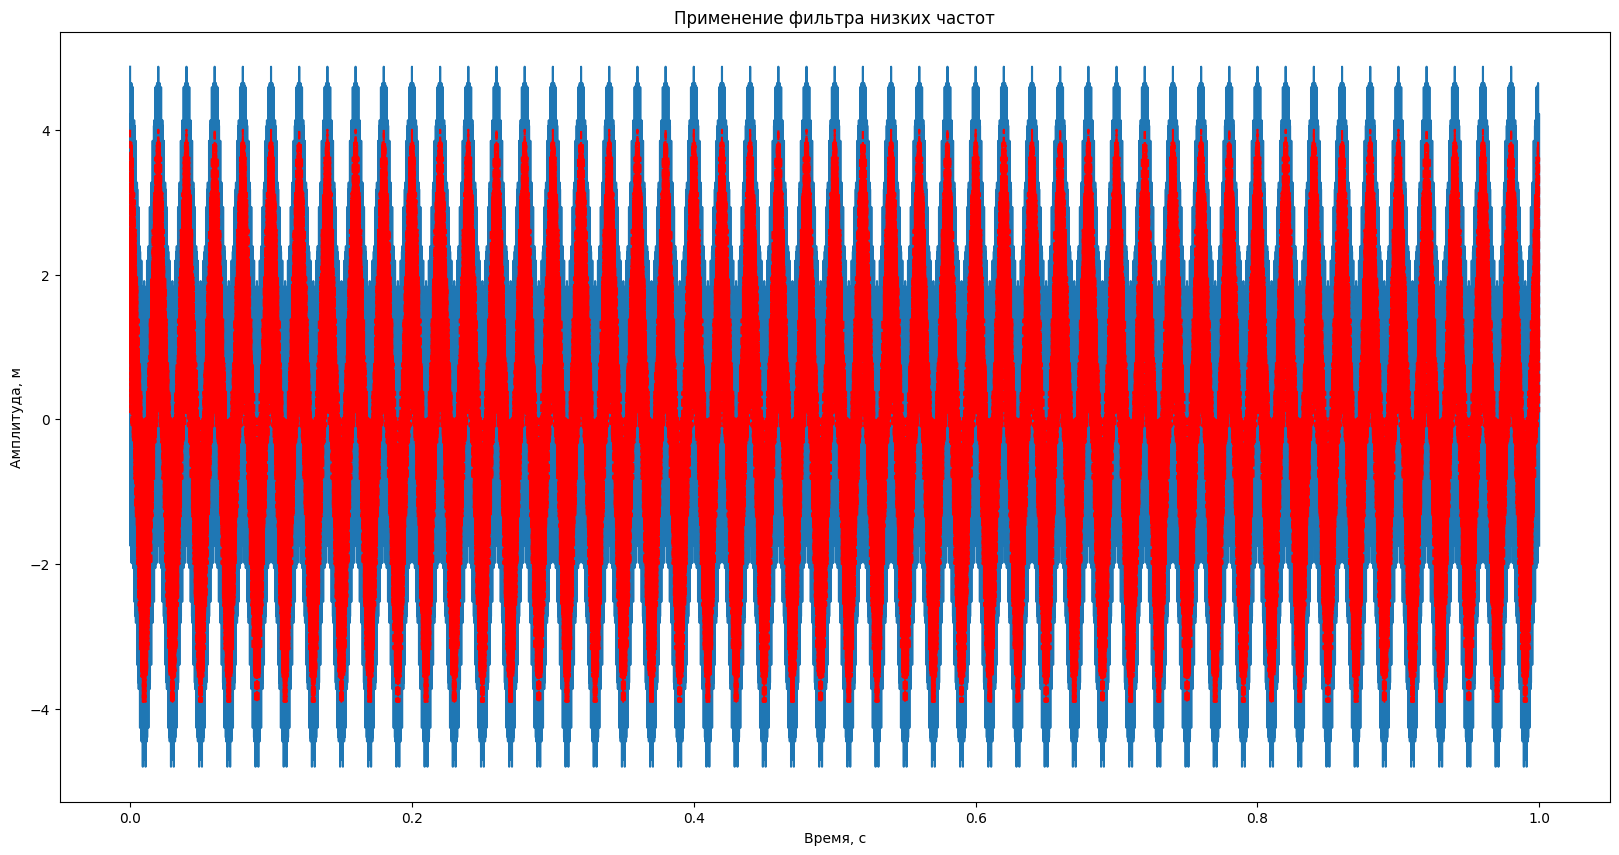

In [817]:
new_nyquist = POINTS / 2

def buttervot_fdw(w, wc):
    """
    Передаточная функция фильтра Баттерворта для низких частот

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота

    Возвращает
    ----------
    Значение предаточной функции заданного аргумента
    """
    return (wc**2 / ((1j*w - wc*np.exp(1j*np.pi/4))*(1j*w - wc*np.exp(1j*np.pi/4*3))))

def FDW(x, y, wc):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * buttervot_fdw(t, wc) for t in x])


ydw = FDW(xf1, yf1, new_nyquist)
butt_y = [A * 2 * buttervot_fdw(t, new_nyquist) for t in xf1]
plt.figure(figsize=(20, 10))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(xf1, A * ydw)
plt.plot(xf1, np.abs(butt_y)/2, 'r--')
plt.xlim(0, 4500+50)
plt.show()


ydw = np.fft.ifft(ydw * len(xf1))
plt.figure(figsize=(20, 10))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Применение фильтра низких частот')
plt.plot(X, ydw)
plt.plot(X, Y, 'r--')
plt.show()

In [818]:
Down_COEF = 50

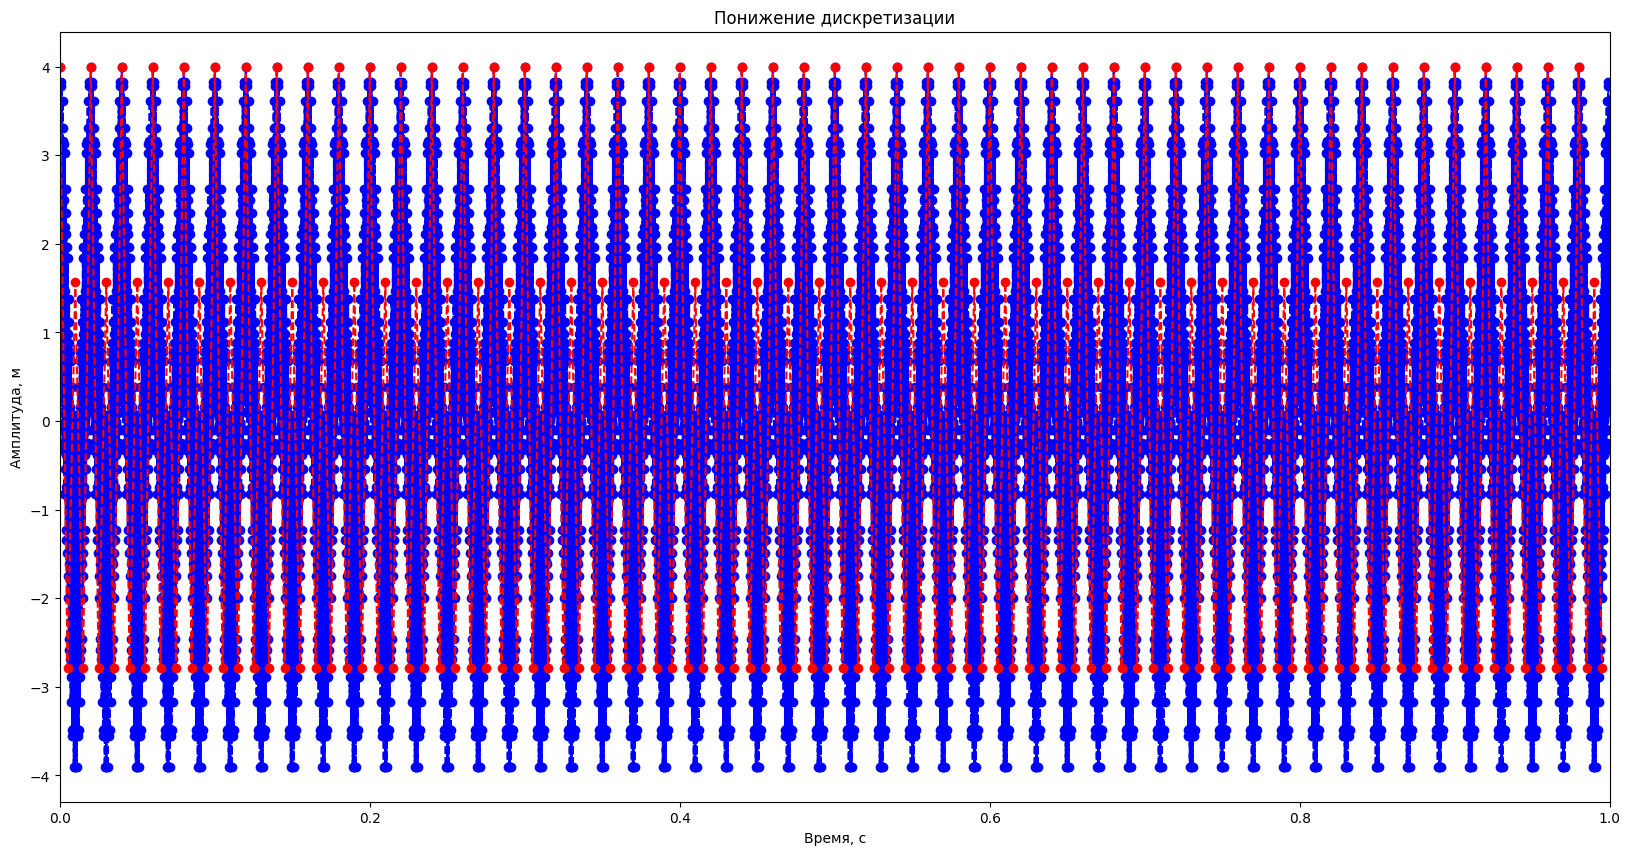

In [819]:
down_signal = []
down_x = []
for i in range(0, len(ydw), Down_COEF):
    down_signal.append(ydw[i])
    down_x.append(X[i])

plt.figure(figsize=(20, 10))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Понижение дискретизации')
plt.plot(X, Y, 'b--', X, Y, 'bo' )
plt.plot(down_x, down_signal, 'r--', down_x, down_signal, 'ro')
plt.xlim(0,1.0)
plt.show()

### Повышение дискретности сигнала

In [820]:
Up_COEF = 2

In [821]:
from scipy.interpolate import interp1d

X = np.linspace(START, END, POINTS)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, F2, A) for t in X])
Y = y1 + y2

f = interp1d(X, Y,  kind='cubic')
up_x = np.linspace(START, END, Up_COEF * POINTS)
up_signal = f(up_x)
len(up_signal)

20000

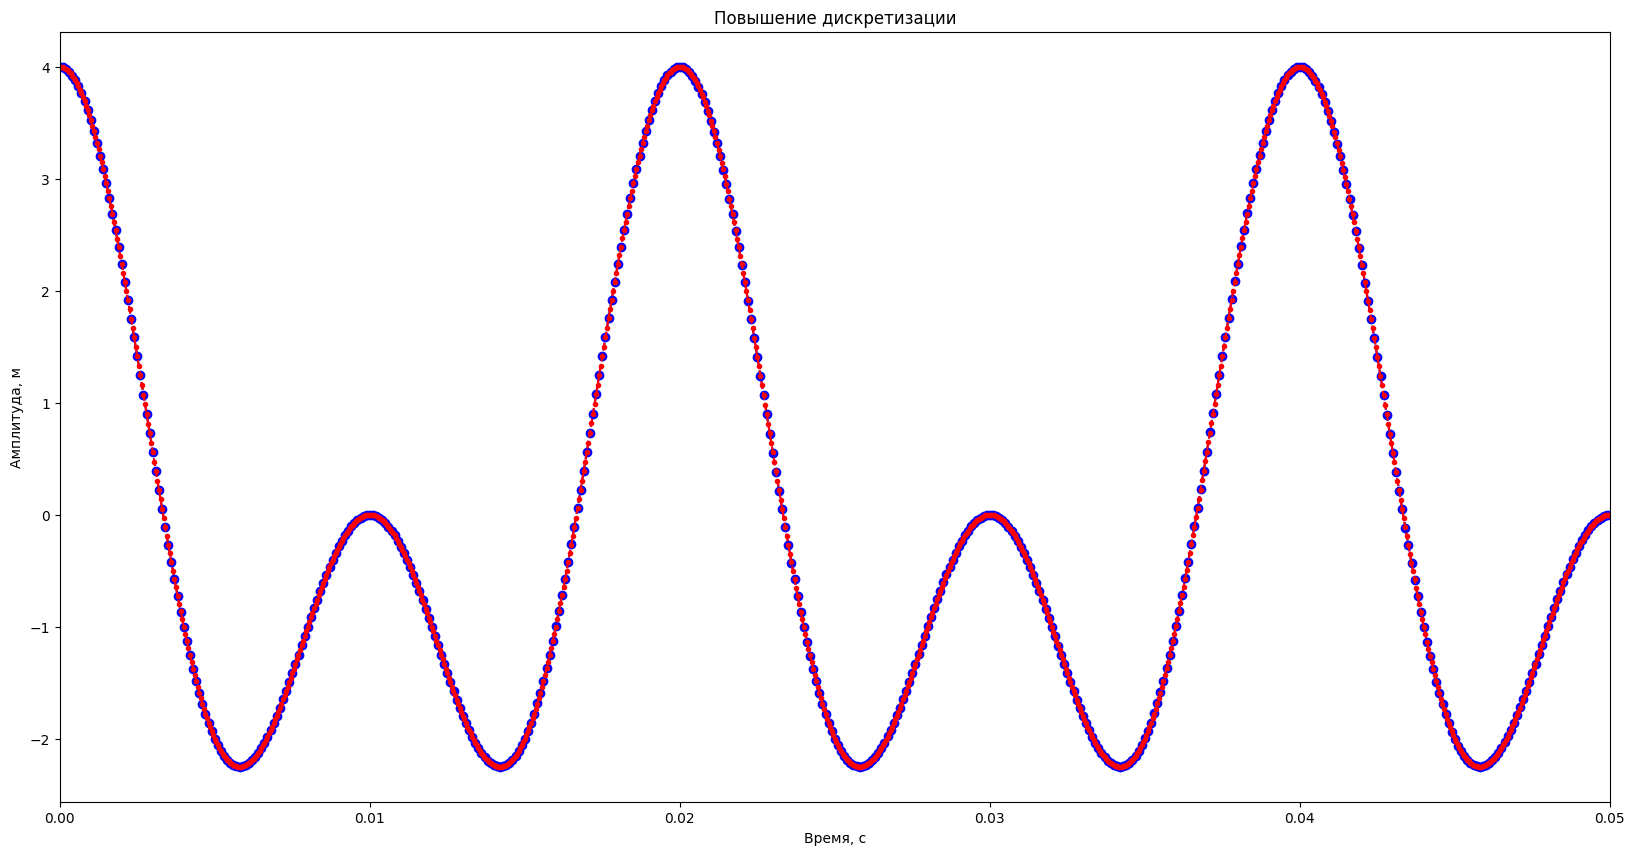

In [822]:
plt.figure(figsize=(20, 10))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Повышение дискретизации')
plt.plot(X, Y, 'b--', X, Y, 'bo' )
plt.plot(up_x, up_signal, 'r--', up_x, up_signal, 'r.')
plt.xlim(0,0.05)
plt.show()

# Задание №7

### Привести все сигналы к единой частоте дискретизации

In [823]:
x1 = np.linspace(START, END, 200)
y1 = np.array([func_1(t, F1, A) for t in x1])
x2 = np.linspace(START, END, 300)
y2 = np.array([func_1(t, F1, A) for t in x2])
x3 = np.linspace(START, END, 500)
y3 = np.array([func_1(t, F1, A) for t in x3])

list_sampling = [len(y1), len(y2), len(y3)]

max_d = np.max(list_sampling)
max_id = list_sampling.index(max_d)
max_id

2

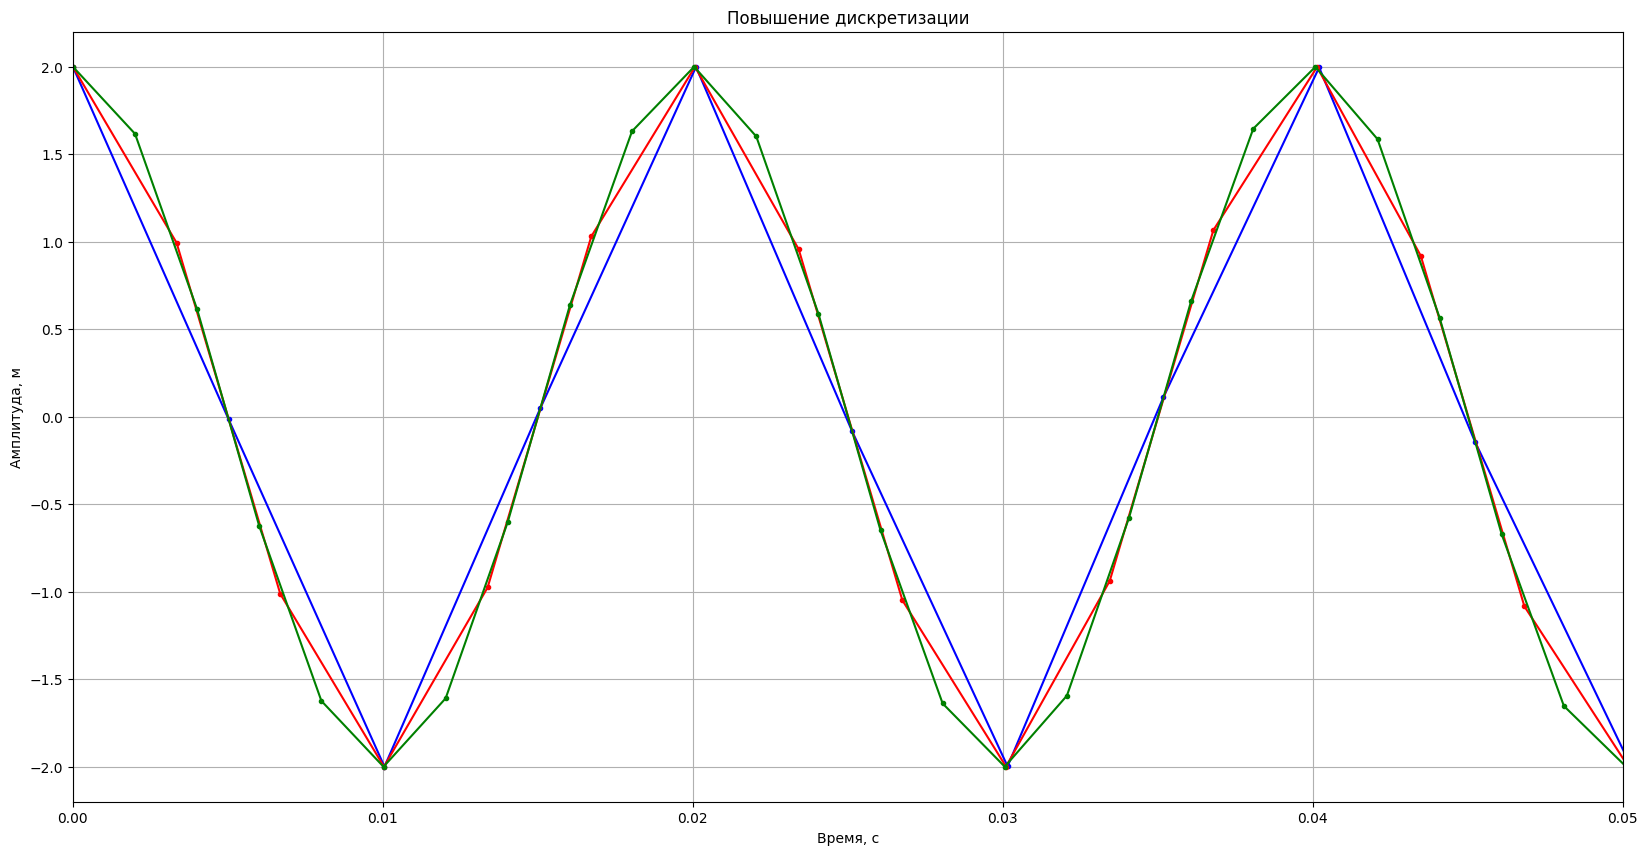

In [824]:
plt.figure(figsize=(20, 10))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Повышение дискретизации')
plt.plot(x1, y1, 'b', x1, y1, 'b.' )
plt.plot(x2, y2, 'r', x2, y2, 'r.')
plt.plot(x3, y3, 'g', x3, y3, 'g.')
plt.xlim(0,0.05)
plt.grid(True)
plt.show()

In [825]:
if max_id == 0:
    coef = max_d / len(y2)
    f = interp1d(x2, y2,  kind='cubic')
    X_ = np.linspace(START, END, int(coef * len(y2)))
    Y_ = f(X_)
        
    coef = max_d / len(y3)
    f = interp1d(x3, y3,  kind='cubic')
    X__ = np.linspace(START, END, int(coef * len(y3)))
    Y__ = f(X__)


if max_id == 1:
    coef = max_d / len(y1)
    f = interp1d(x1, y1,  kind='cubic')
    X_ = np.linspace(START, END, int(coef * len(y1)))
    Y1 = f(X_)

    coef = max_d / len(y3)
    f = interp1d(x3, y3,  kind='cubic')
    X__ = np.linspace(START, END, int(coef * len(y3)))
    Y__ = f(X__)
    print(0)

if max_id == 2:
    coef = max_d / len(y1)
    f = interp1d(x1, y1,  kind='cubic')
    X_ = np.linspace(START, END, int(coef * len(y1)))
    Y_ = f(X_)

    coef = max_d / len(y2)
    f = interp1d(x2, y2,  kind='cubic')
    X__ = np.linspace(START, END, int(coef * len(y2)))
    Y__ = f(X__)

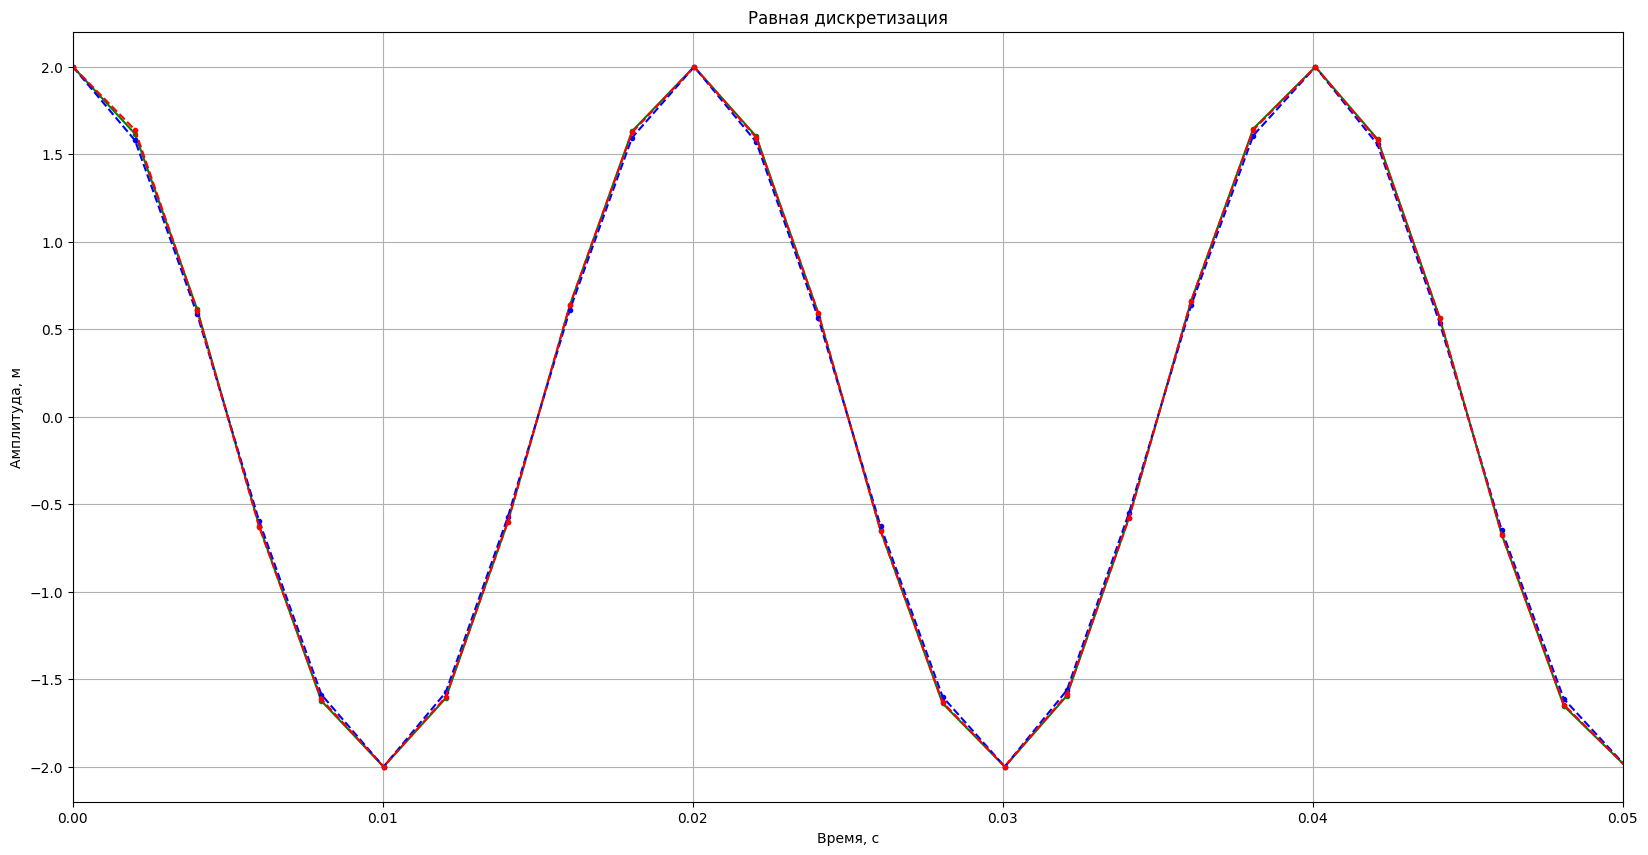

In [826]:
plt.figure(figsize=(20, 10))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Равная дискретизация')

if max_id == 0:
    plt.plot(x1, y1, 'b', x1, y1, 'b.' )
    plt.plot(X_, Y_, 'r--', X_, Y_, 'r.')
    plt.plot(X__, Y__, 'g--', X__, Y__, 'g.')
    
if max_id == 1:
    plt.plot(x2, y2, 'r', x2, y2, 'r.' )
    plt.plot(X_, Y_, 'b--', X_, Y_, 'b.')
    plt.plot(X__, Y__, 'g--', X__, Y__, 'g.')

if max_id == 2:
    plt.plot(x3, y3, 'g', x3, y3, 'g.' )
    plt.plot(X_, Y_, 'b--', X_, Y_, 'b.')
    plt.plot(X__, Y__, 'r--', X__, Y__, 'r.')
plt.grid(True)
plt.xlim(0,0.05)
plt.show()